# <center> A Data Science Dive Into Powerlifting Meets </center>
## <center> Exploring the Data Science Lifecycle </center>
![Image of Yaktocat](https://www.openpowerlifting.org/static/images/logo-compressed.e87731f9ce53411287c05e88356bf68e.svg)
### <center> Elias Prieto </center>

## <center> Introduction </center>

Entering my freshman year of college, I weighed around 230 pounds and stood at 6 feet tall. During high school, my involvement in structured sports kept me relatively in shape through constant exercise and training. However, with the newfound freedom of college and a lack of motivation to maintain a workout routine, I gradually became out of shape.

Upon returning home for winter break and reuniting with my best friends from high school, I made the decision to embark on my fitness journey alongside them. The COVID-19 pandemic, which sent everyone back home from school, provided a unique opportunity to work out consistently with my friends and establish a regular routine. Over the course of two years, I dedicated myself wholeheartedly and successfully lost approximately 50 pounds while becoming stronger than ever before.

As my passion for lifting grew, I became increasingly interested in powerlifting meets. These events offer individuals a platform to showcase their hard work, compete with others, and share their fitness journeys. What's more, I discovered that I was not alone in my pursuit. According to <a href="https://www.washingtonpost.com/arts-entertainment/2019/04/19/using-youtube-show-off-world-powerlifting/" target="_blank">USA Powerlifting</a>, competition membership has more than tripled since 2014, surging from 6,410 members to 22,026. In 2018, the federation reported a 2:1 ratio of men to women registered for competitions, a significant improvement from the 4:1 ratio observed four years prior. This indicates a substantial increase in participation in powerlifting, accompanied by greater gender equality.

With a passion for computer science, mathematics, and fitness, choosing a topic for my data science project was an easy decision. The amazing team at <a href="https://www.openpowerlifting.org/" target="_blank">Open Powerlifting</a> has curated and organized a vast amount of powerlifting meet data, providing an excellent starting point for my project. The dataset can be downloaded from their website.

The main objective of this project is to explore the entire data science pipeline. Through analyzing this extensive dataset, which can be downloaded <a href="https://openpowerlifting.gitlab.io/opl-csv/bulk-csv.html" target="_blank">here</a>, I aim to uncover interesting trends and correlations that can benefit both novice powerlifters and industry pioneers alike. By leveraging the wealth of information available, I hope to provide valuable insights and inform the powerlifting community.

> ## Why is this important? 
>The significance of undertaking this data science project lies in the rapid growth and evolving landscape of powerlifting in recent years. This surge in participation has not only resulted in higher cash prizes for champions but has also fostered a significantly more competitive environment, attracting a greater number of individuals who are eager to deepen their understanding of the sport. By delving into the analysis of powerlifting meet data, this project serves to empower enthusiasts and athletes alike with valuable insights that can enhance their knowledge and performance. Furthermore, by shedding light on the intricate patterns and trends within the sport, this endeavor holds the potential to contribute to the advancement and development of powerlifting as a whole.

>Furthermore, this data science project gains additional significance and interest within the context of the increasingly intertwined realms of technology and fitness. The advent of innovative wearable devices, mobile applications, and data-driven training methodologies has revolutionized the way individuals engage with their fitness journeys. By harnessing the power of data analytics and machine learning techniques to analyze the extensive powerlifting meet data, this project aims to bridge the gap between technology and fitness, providing valuable insights into the performance, progress, and training strategies of powerlifters. This exploration not only contributes to the broader understanding of powerlifting as a sport but also highlights the potential for data science to shape and optimize training methodologies in the ever-evolving landscape of fitness.

During this project we will explore the key points every Data Science project should inlcude:
1. Data Collection
2. Data Processing
3. Explanatory Analysis and Data Visualization
4. Modeling the Data with Machine Learning
5. Interpretation: Insight & Policy Decision

## <center> Data Collection </center>

### Part 1: Retrieving the Data

In this section, I will utilize the comprehensive data set from Open Powerlifting as the sole source for analysis, as it encompasses the necessary information for this project. Python will serve as the primary programming language, facilitating the execution of all required operations on the data set. To commence this study, it is imperative to import a range of pertinent Python libraries that will enable efficient and effective data manipulation and analysis.

In [1]:
# Essential libraries for all parts of the data science lifecycle
import pandas as pd
import numpy as np

# for plotting data and visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# for explanatory analysis section and creating many models for machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor

I have downloaded the CSV file from Open Powerlifting and now will read it in using Pandas. After this, we can clean up the data!

In [2]:
# reading CSV through pandas
df = pd.read_csv('powerlifting.csv', dtype=object)

# displaying Dataframe
df

Name Sex Event   Equipment   Age AgeClass  \
0                   Alona Vladi   F   SBD         Raw    33    24-34   
1            Galina Solovyanova   F   SBD         Raw    43    40-44   
2                Daniil Voronin   M   SBD         Raw  15.5    16-17   
3                Aleksey Krasov   M   SBD         Raw    35    35-39   
4        Margarita Pleschenkova   M   SBD         Raw  26.5    24-34   
...                         ...  ..   ...         ...   ...      ...   
2887194            Inna Orobets   F   SBD  Single-ply    45    45-49   
2887195             Ágnes Szabó   F   SBD  Single-ply  27.5    24-34   
2887196   Brenda van der Meulen   F   SBD  Single-ply  37.5    35-39   
2887197            Kelly Phasey   F   SBD  Single-ply  39.5    35-39   
2887198  Hildeborg Juvet Hugdal   F   SBD  Single-ply  32.5    24-34   

        BirthYearClass Division BodyweightKg WeightClassKg  ... Tested  \
0                24-39        O         58.3            60  ...    Yes   
1                40-49       M1         73.1            75  ...    Yes   
2                14-18        T         67.4            75  ...    Yes   
3                24-39        O        66.65            75  ...    Yes   
4                24-39        O        72.45            75  ...    Yes   
...                ...      ...          ...           ...  ...    ...   
2887194          40-49     Open        109.3           84+  ...    Yes   
2887195          24-39     Open       113.22           84+  ...    Yes   
2887196          24-39     Open       110.79           84+  ...    Yes   
2887197          40-49     Open       124.53           84+  ...    Yes   
2887198          24-39     Open          123           84+  ...    Yes   

             Country State Federation ParentFederation        Date  \
0             Russia   NaN        GFP              NaN  2019-05-11   
1             Russia   NaN        GFP              NaN  2019-05-11   
2             Russia   NaN        GFP              NaN  2019-05-11   
3             Russia   NaN        GFP              NaN  2019-05-11   
4             Russia   NaN        GFP              NaN  2019-05-11   
...              ...   ...        ...              ...         ...   
2887194      Ukraine   NaN        IPF              IPF  2016-11-14   
2887195      Hungary   NaN        IPF              IPF  2016-11-14   
2887196  Netherlands   NaN        IPF              IPF  2016-11-14   
2887197      England   NaN        IPF              IPF  2016-11-14   
2887198       Norway   NaN        IPF              IPF  2016-11-14   

        MeetCountry MeetState MeetTown                  MeetName  
0            Russia       NaN  Bryansk           Open Tournament  
1            Russia       NaN  Bryansk           Open Tournament  
2            Russia       NaN  Bryansk           Open Tournament  
3            Russia       NaN  Bryansk           Open Tournament  
4            Russia       NaN  Bryansk           Open Tournament  
...             ...       ...      ...                       ...  
2887194         USA       NaN  Orlando  World Open Championships  
2887195         USA       NaN  Orlando  World Open Championships  
2887196         USA       NaN  Orlando  World Open Championships  
2887197         USA       NaN  Orlando  World Open Championships  
2887198         USA       NaN  Orlando  World Open Championships  

[2887199 rows x 41 columns]

Typically, it is customary to display only the initial rows of a data set; however, it is worth highlighting the substantial size of this particular data set. Boasting nearly 3 million rows and comprising 41 distinct features, its scale is truly remarkable. For those who may be new to powerlifting or possess limited familiarity, it is worthwhile to read this <a href="https://openpowerlifting.gitlab.io/opl-csv/bulk-csv-docs.html" target="_blank">documentation</a> which speaks on the purpose and characteristics of each of these 41 columns.

As any seasoned data scientist would attest, a significant portion of the data is often marred by inconsistencies, irrelevant values, non-uniform data types, and extensive missing data. These factors necessitate meticulous data cleansing and refinement processes to ensure data integrity and suitability for analysis.

With this understanding, we progress to Part 2 of the Data Collection phase: Data Tidying. Initially, certain aspects of the data set can be deemed extraneous for the intended analysis. Additionally, given the considerable size of the data set, reducing the number of rows will prove advantageous. Although it is typically advised to avoid indiscriminately discarding rows with missing values, considering the magnitude of this data set, such an approach can be deemed acceptable. Moreover, our focus will be directed toward specific powerlifting federations, namely USAPL (USA Powerlifting) and IPF (International Powerlifting Federation). These federations uphold stringent drug-testing protocols, ensuring a more level playing field among participants and enhancing the credibility of recorded lifts. Lastly, attention will be centered on individuals who partook in the SBD (Squat, Bench, Deadlift) event, which serves as the quintessential powerlifting trifecta and represents the customary benchmark for any powerlifting meet.

Now that we have some considerations in mind, let's do some processing!

### Part 2: Tidying the Data

In [3]:
# get rid of unnecessary columns
df = df[['Date', 'Age', 'Sex', 'Event', 'BirthYearClass', 'BodyweightKg', \
       'Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Best3SquatKg', \
       'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Best3BenchKg', \
       'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg', \
       'Best3DeadliftKg', 'TotalKg', 'Place', 'Dots', 'Wilks', 'Glossbrenner', \
       'Tested', 'Federation']]


# drop all rows with Nan values since we only want to analyze people who completed all their lifts
# and have important data like their weight and age/birthyearclass
df = df.dropna()

# restrict to just USAPL and IPF federations
df = df[(df['Federation'] == 'USAPL') | (df['Federation'] == 'IPF')]

# restrict to SBD and Tested meets only
df = df[(df['Event'] == 'SBD') & (df['Tested'] == 'Yes')]
df

Date   Age Sex Event BirthYearClass BodyweightKg Squat1Kg  \
307302   2018-11-10    48   F   SBD          40-49        51.35    102.5   
307304   2018-11-10    47   F   SBD          40-49         71.6      100   
307305   2018-11-10  43.5   F   SBD          40-49       114.65       70   
307306   2018-11-10  38.5   F   SBD          24-39         51.1     92.5   
307307   2018-11-10  26.5   F   SBD          24-39           57     92.5   
...             ...   ...  ..   ...            ...          ...      ...   
2887193  2016-11-14    32   F   SBD          24-39           95      250   
2887194  2016-11-14    45   F   SBD          40-49        109.3      235   
2887195  2016-11-14  27.5   F   SBD          24-39       113.22   -237.5   
2887196  2016-11-14  37.5   F   SBD          24-39       110.79      210   
2887197  2016-11-14  39.5   F   SBD          40-49       124.53      210   

        Squat2Kg Squat3Kg Best3SquatKg  ... Deadlift2Kg Deadlift3Kg  \
307302       110    112.5        112.5  ...       122.5       127.5   
307304     112.5      120          120  ...       142.5         150   
307305        80     92.5         92.5  ...       127.5         140   
307306        95     97.5         97.5  ...       117.5         125   
307307      97.5    102.5        102.5  ...       112.5         115   
...          ...      ...          ...  ...         ...         ...   
2887193      255      260          260  ...       222.5       227.5   
2887194   -242.5    242.5        242.5  ...         210         215   
2887195    237.5   -247.5        237.5  ...         200        -210   
2887196    222.5    227.5        227.5  ...         190        -195   
2887197      220   -227.5          220  ...        -155        -155   

        Best3DeadliftKg TotalKg Place    Dots   Wilks Glossbrenner Tested  \
307302            127.5   292.5     1  359.67  368.19       326.53    Yes   
307304              150     325     1  324.56  318.39       280.50    Yes   
307305              140     315     1  256.19  254.00       215.78    Yes   
307306              125     275     1  339.31  347.46       308.21    Yes   
307307              115   277.5     1  317.93  322.01       284.73    Yes   
...                 ...     ...   ...     ...     ...          ...    ...   
2887193           227.5   647.5     2  564.05  548.04       473.70    Yes   
2887194             215     645     3  532.83  525.14       447.12    Yes   
2887195             200   632.5     4  516.46  511.26       434.61    Yes   
2887196             190   617.5     5  507.79  501.32       426.60    Yes   
2887197             145     515     6  409.13  409.13       345.98    Yes   

        Federation  
307302       USAPL  
307304       USAPL  
307305       USAPL  
307306       USAPL  
307307       USAPL  
...            ...  
2887193        IPF  
2887194        IPF  
2887195        IPF  
2887196        IPF  
2887197        IPF  

[176734 rows x 25 columns]

Having ascertained the relevant features and aspects for our analysis, further data refinement is warranted. This entails tidying up the data to ensure consistency and accuracy. Specifically, our focus is on appropriate typecasting of each column as required. Additionally, we discard any values that could not be successfully typecasted or those that introduce ambiguity, as they might impede subsequent stages of this project.

For instance, it is important to note the presence of negative values in certain lift columns, which indicate failed attempts. To streamline data processing, we opt to consider only individuals who have succeeded in all three attempts, thereby omitting failed lifts from our analysis. Moreover, we address certain data peculiarities, such as weight class values that denote only the minimum weight (designated as "X+" for a given weight X). Taking all these considerations into account, we are now poised to implement the necessary preprocessing steps through code. Let us examine the following code snippet, which performs these crucial data transformations.

In [4]:
for i,row in df.iterrows():
    row['Date'] = pd.to_datetime(row['Date'])
    try:
        row['Age'] = float(row['Age'])
    except:
        row['Age'] = np.nan
    # want to nake distinction between Male and Female 
    if row['Sex'] == 'Mx':
        row['Sex'] = np.nan
        
    lifts = ['Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Best3SquatKg', \
       'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Best3BenchKg', \
       'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg', \
       'Best3DeadliftKg', 'TotalKg']
      
    # cast all lift values as floats and get rid of invalid data
    for lift in lifts:
        try:
            row[lift] = float(row[lift])
            if row[lift] <= 0:
                 row[lift] = np.nan
        except:
             row[lift] = np.nan
    # cast all places as integers and get rid of invalid data
    try:
        row['Place'] = int(row['Place'])
        if row['Place'] > 0:
            row['Place'] = int(row['Place'])
        else:
            row['Place'] = np.nan
    except:
        row['Place'] = np.nan
    
    # cast all scores as floats and get rid of invalid data         
    for score in ['Dots', 'Wilks', 'Glossbrenner']:
        try:
            row[score] = float(row[score])  
            if row[score] > 0:
                 row[score] = float(row[score])
            else:
                row[score] = np.nan
        except:
            row[score] = np.nan
cleanedData = df.dropna()
# We fixed the event to be SBD and the Federations to only be USAPL and IPF which are tested federations
cleanedData = cleanedData.drop(['Event', 'Tested', 'Federation'], axis=1)
cleanedData

Date   Age Sex BirthYearClass BodyweightKg Squat1Kg  \
307305   2018-11-10 00:00:00  43.5   F          40-49       114.65     70.0   
307309   2018-11-10 00:00:00  24.5   F          24-39        58.95    102.5   
307314   2018-11-10 00:00:00  24.5   F          24-39           71    110.0   
307318   2018-11-10 00:00:00  30.5   F          24-39        97.15    150.0   
307319   2018-11-10 00:00:00  43.5   F          40-49       114.65     70.0   
...                      ...   ...  ..            ...          ...      ...   
2886975  2022-08-27 00:00:00  18.5   F          19-23         69.9    155.0   
2886978  2022-08-27 00:00:00  20.5   F          19-23         82.3    150.0   
2886998  2016-11-14 00:00:00  37.5   M          24-39         65.8    250.0   
2887072  2016-11-14 00:00:00  31.0   M          24-39       118.25    400.0   
2887115  2016-11-14 00:00:00  39.5   F          40-49        51.59    155.0   

        Squat2Kg Squat3Kg Best3SquatKg Bench1Kg  ... Best3BenchKg Deadlift1Kg  \
307305      80.0     92.5         92.5     65.0  ...         82.5       110.0   
307309     110.0    115.0        115.0     57.5  ...         62.5       127.5   
307314     117.5    122.5        122.5     67.5  ...         75.0       137.5   
307318     165.0    172.5        172.5     65.0  ...         77.5       165.0   
307319      80.0     92.5         92.5     65.0  ...         82.5       110.0   
...          ...      ...          ...      ...  ...          ...         ...   
2886975    165.0    172.5        172.5     75.0  ...         82.5       140.0   
2886978    165.0    175.0        175.0    100.0  ...        112.5       130.0   
2886998    260.0    262.5        262.5    190.0  ...        200.0       275.0   
2887072    415.0    422.5        422.5    310.0  ...        327.5       347.5   
2887115    165.0    175.0        175.0     90.0  ...        100.0       150.0   

        Deadlift2Kg Deadlift3Kg Best3DeadliftKg TotalKg Place    Dots   Wilks  \
307305        127.5       140.0           140.0   315.0     1  256.19   254.0   
307309        135.0       142.5           142.5   320.0     2  358.73  361.69   
307314        147.5       155.0           155.0   352.5     3  353.66   347.3   
307318        175.0       187.5           187.5   437.5     1  377.64  367.52   
307319        127.5       140.0           140.0   315.0     2  256.19   254.0   
...             ...         ...             ...     ...   ...     ...     ...   
2886975       147.5       150.0           150.0   405.0     3  409.89  403.31   
2886978       140.0       150.0           150.0   437.5     3  406.53  394.24   
2886998       287.5       300.0           300.0   762.5     3  598.79  600.21   
2887072       360.0       375.0           375.0  1125.0     1  649.29  649.05   
2887115       160.0       165.0           165.0   440.0     6  539.28  551.88   

        Glossbrenner  
307305        215.78  
307309        319.65  
307314        306.03  
307318        316.84  
307319        215.78  
...              ...  
2886975       355.52  
2886978       345.14  
2886998       583.31  
2887072       621.82  
2887115       489.34  

[25616 rows x 22 columns]

Great progress! With the data now cleaned, we have achieved a streamlined dataset comprising approximately 25,000 rows, providing ample material for our analysis. We are fortunate to have access to Open Powerlifting's well-maintained dataset, which has facilitated this particular phase of the project. To optimize our workflow and minimize the need for repetitive kernel restarts and data reloading, I have developed a code snippet to save the cleaned dataset to a CSV file. While the code is currently commented out, its inclusion serves as a valuable tool for efficiency and convenience.

In [5]:
#cleanedData = cleanedData.astype({'Date': 'datetime64[ns]', 'Age': 'float64', 'BodyweightKg': 'float64', \
#                                 'Squat1Kg': 'float64', 'Squat2Kg': 'float64', 'Squat3Kg': 'float64', 'Best3SquatKg': 'float64',\
#                                 'Bench1Kg': 'float64', 'Bench2Kg': 'float64', 'Bench3Kg': 'float64', 'Best3BenchKg': 'float64',\
#                                 'Deadlift1Kg': 'float64', 'Deadlift2Kg': 'float64', 'Deadlift3Kg': 'float64', 'Best3DeadliftKg': 'float64',\
#                                 'TotalKg': 'float64', 'Place': 'int', 'Dots': 'float64', 'Wilks': 'float64',  'Glossbrenner': 'float64'})

#cleanedData.dtypes

# save cleaned data so that I can do analysis without having to run all above cells on a kernal restart
#cleanedData.to_csv('cleaned_data.csv', index=False)

## <center> Explantory Analysis and Data Visualization </center>

In this stage of the data science lifecycle, our focus is on visualizing and graphing our dataset. The objective is to identify potential trends, correlations, and significant factors that can impact our analysis and models in subsequent sections. By analyzing these graphs, we can generate ideas for model parameters, explore intriguing avenues of investigation, and gain a comprehensive understanding of the dataset. To begin, we will import the cleaned-up data from the CSV file, enabling us to proceed with our visualization tasks.

In [6]:
# reading CSV through pandas
df = pd.read_csv('cleaned_data.csv')

# displaying head of Dataframe
df.head()

Date   Age Sex BirthYearClass  BodyweightKg  Squat1Kg  Squat2Kg  \
0  2018-11-10  43.5   F          40-49        114.65      70.0      80.0   
1  2018-11-10  24.5   F          24-39         58.95     102.5     110.0   
2  2018-11-10  24.5   F          24-39         71.00     110.0     117.5   
3  2018-11-10  30.5   F          24-39         97.15     150.0     165.0   
4  2018-11-10  43.5   F          40-49        114.65      70.0      80.0   

   Squat3Kg  Best3SquatKg  Bench1Kg  ...  Best3BenchKg  Deadlift1Kg  \
0      92.5          92.5      65.0  ...          82.5        110.0   
1     115.0         115.0      57.5  ...          62.5        127.5   
2     122.5         122.5      67.5  ...          75.0        137.5   
3     172.5         172.5      65.0  ...          77.5        165.0   
4      92.5          92.5      65.0  ...          82.5        110.0   

   Deadlift2Kg  Deadlift3Kg  Best3DeadliftKg  TotalKg  Place    Dots   Wilks  \
0        127.5        140.0            140.0    315.0      1  256.19  254.00   
1        135.0        142.5            142.5    320.0      2  358.73  361.69   
2        147.5        155.0            155.0    352.5      3  353.66  347.30   
3        175.0        187.5            187.5    437.5      1  377.64  367.52   
4        127.5        140.0            140.0    315.0      2  256.19  254.00   

   Glossbrenner  
0        215.78  
1        319.65  
2        306.03  
3        316.84  
4        215.78  

[5 rows x 22 columns]

In powerlifting meets, individuals are typically categorized into body weight classes to ensure fair competition among participants of similar sizes. This practice aims to level the playing field since rankings are based on the total amount of weight lifted (TotalKg column). The total is calculated by summing up the best lifts from each of the three attempts in the Bench, Squat, and Deadlift categories. Additionally, powerlifting meets often include awards based on strength metrics such as the Wilks Score, DOTS, and Glossbrenner, which highlight the lifter with the highest overall strength.

To analyze the distribution of the dataset based on weight classes, we will create a weight class column and examine the data's distribution within each class. Furthermore, since there are likely to be significant variations between males and females across different weight classes, we will create separate plots for each gender to gain a clearer understanding of the data where necessary.

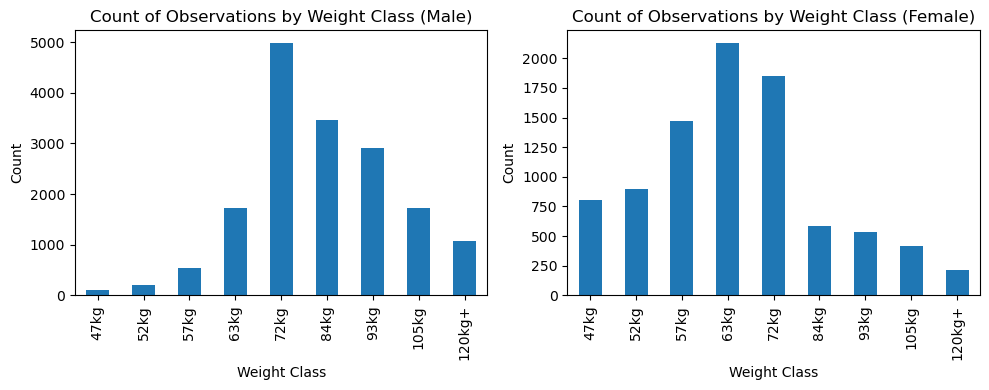

In [7]:
import matplotlib.pyplot as plt

# Create Weight Classes
bins = [0, 52, 57, 63, 72, 84, 93, 105, 120, 1200]
labels = ['47kg', '52kg', '57kg', '63kg', '72kg', '84kg', '93kg', '105kg', '120kg+']
df['WeightClass'] = pd.cut(df['BodyweightKg'], bins=bins, labels=labels)

# Filter observations by gender
male_df = df[df['Sex'] == 'M']
female_df = df[df['Sex'] == 'F']

# Get count of observations by weight class for each gender
male_weightclass_counts = male_df['WeightClass'].value_counts()
female_weightclass_counts = female_df['WeightClass'].value_counts()

# Sort weight class categories
sorted_weightclasses = sorted(labels, key=lambda x: labels.index(x))

# Plot count of observations by weight class for males
plt.figure(figsize=(10, 4))  # Adjust the figure size as needed
plt.subplot(1, 2, 1)
male_weightclass_counts.loc[sorted_weightclasses].plot(kind='bar')
plt.title('Count of Observations by Weight Class (Male)')
plt.xlabel('Weight Class')
plt.ylabel('Count')

# Plot count of observations by weight class for females
plt.subplot(1, 2, 2)
female_weightclass_counts.loc[sorted_weightclasses].plot(kind='bar')
plt.title('Count of Observations by Weight Class (Female)')
plt.xlabel('Weight Class')
plt.ylabel('Count')

plt.tight_layout()  # Adjust spacing between subplots if needed
plt.show()

Upon examining the data, we observe that there is a notable imbalance between the number of data points for males and females. Males tend to be more prevalent in the heavier weight classes, while females are more represented in the lighter weight classes. Nonetheless, there is still a substantial amount of data available for each weight class, which is promising for our analysis.

Moving forward, let's explore the relationship between age and the total weight lifted in powerlifting meets. This analysis will shed light on the impact of age on strength. To gain further insights, we will generate separate graphs for males and females, allowing us to discern any potential disparities between the sexes concerning this particular factor.

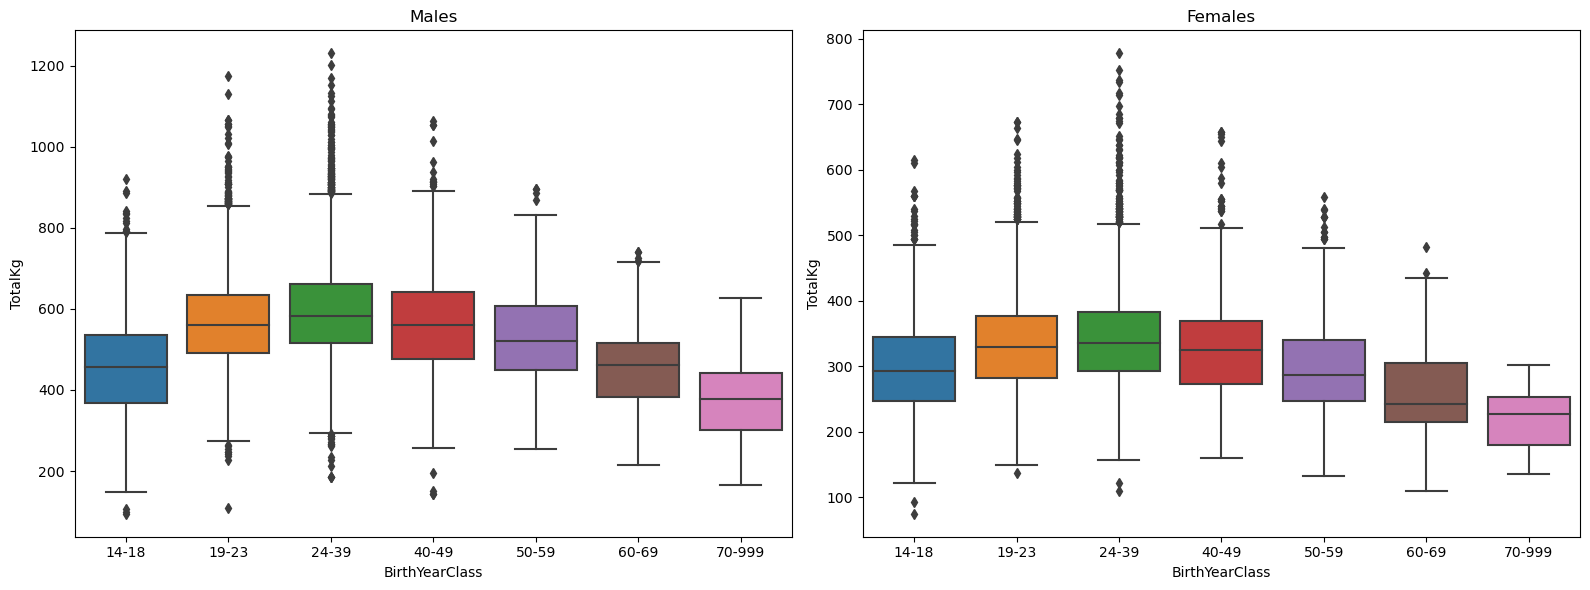

In [8]:
# create ordered categories for birth year class
ordered_birthyear = pd.Categorical(df['BirthYearClass'], 
                                    categories=['14-18', '19-23', '24-39', '40-49', '50-59', '60-69', '70-999'],
                                    ordered=True)

# create a copy of the dataframe with ordered birth year class
df_ordered = df.copy()
df_ordered['BirthYearClass'] = ordered_birthyear
df_ordered = df_ordered.sort_values(by='BirthYearClass')

# create separate plots for males and females
male_df = df_ordered[df_ordered['Sex'] == 'M']
female_df = df_ordered[df_ordered['Sex'] == 'F']

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 6))

# plot for males
sns.boxplot(x='BirthYearClass', y='TotalKg', data=male_df, ax=ax1)
ax1.set_title('Males')

# plot for females
sns.boxplot(x='BirthYearClass', y='TotalKg', data=female_df, ax=ax2)
ax2.set_title('Females')

plt.tight_layout()
plt.show()

The analysis of age in relation to the total weight lifted reveals an intriguing pattern. We observe an inverse quadratic curve, with the peak occurring within the 24-38 year age group. The trend remains almost identical for both males and females, suggesting that gender does not significantly influence relative total strength across different age groups. However, it is important to note that further mathematical analysis is required to precisely determine the magnitude and significance of this relationship, which will be addressed in subsequent stages of this project. Nevertheless, this finding warrants our attention, and in future visualizations, we may investigate whether age plays a role in other observed trends. Another captivating aspect to explore is the impact of body weight on strength. As mentioned earlier, various strength metrics such as the Wilks Score, DOTS scores, and Glossbrenner score are used. Since the Wilks Score is the most commonly utilized, let's generate separate graphs for males and females based on this metric.

In [9]:
# for future use when wanting to compare males and females
male_lifters = df[df['Sex'] == 'M']
female_lifters = df[df['Sex'] == 'F']

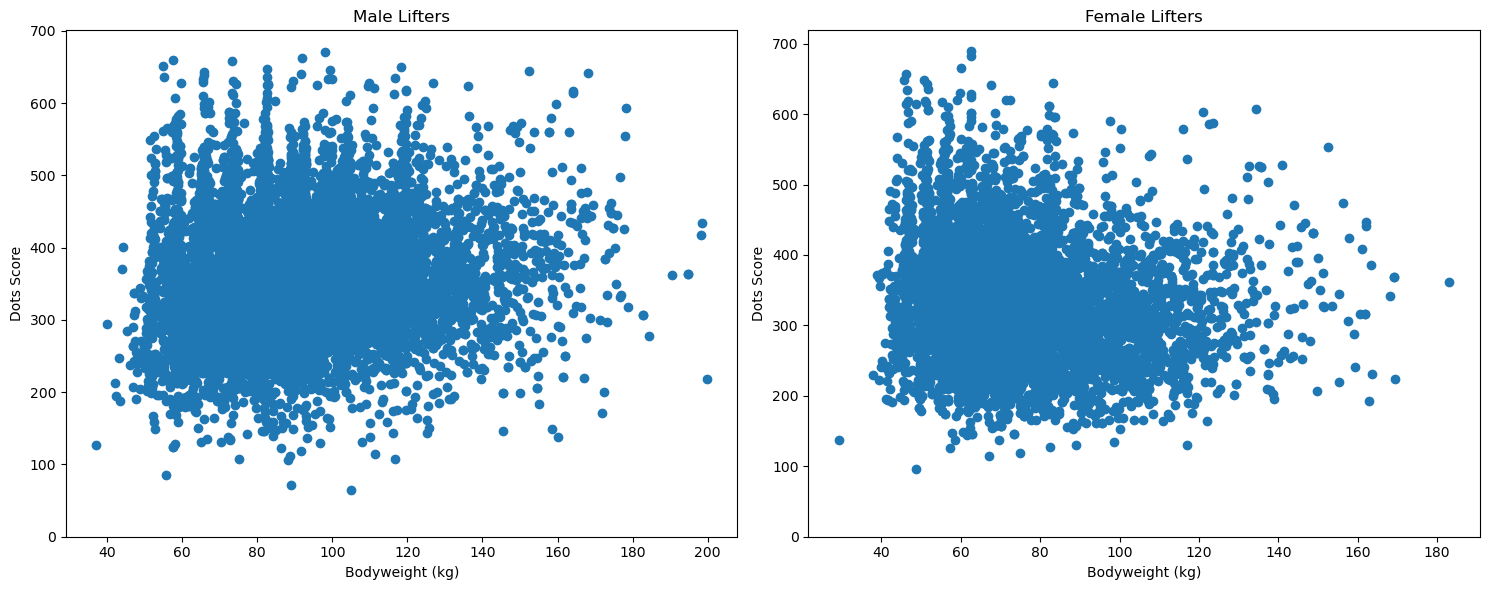

In [10]:
# Create subplots
fig, axes = plt.subplots(ncols=2, figsize=(15, 6))

# Plot male data
axes[0].scatter(male_lifters['BodyweightKg'], male_lifters['Dots'])
axes[0].set_xlabel('Bodyweight (kg)')
axes[0].set_ylabel('Dots Score')
axes[0].set_title('Male Lifters')

# Plot female data
axes[1].scatter(female_lifters['BodyweightKg'], female_lifters['Dots'])
axes[1].set_xlabel('Bodyweight (kg)')
axes[1].set_ylabel('Dots Score')
axes[1].set_title('Female Lifters')

y_ticks = [0, 100, 200, 300, 400, 500, 600, 700]
axes[0].set_yticks(y_ticks)
axes[1].set_yticks(y_ticks)

plt.tight_layout()
plt.show()

Upon examining the plots, it appears that the distributions for males and females are relatively similar, and no clear and definitive trend emerges. There is a possibility of a slightly denser cluster of higher Wilks scores for lighter body weights, but the plots do not strongly support such a relationship. Nevertheless, exploring this association has provided valuable insights.

Moving forward, let's investigate another potentially informative relationship: the connection between the opening lifts (for Squat, Bench, and Deadlift) and the total weight lifted (sum of the best lifts). There is a strong suspicion that some form of relationship exists between these variables, but the nature of this relationship remains uncertain. Could it be linear, quadratic, or perhaps something entirely different? To shed light on this matter, let's examine separate plots for males and females.

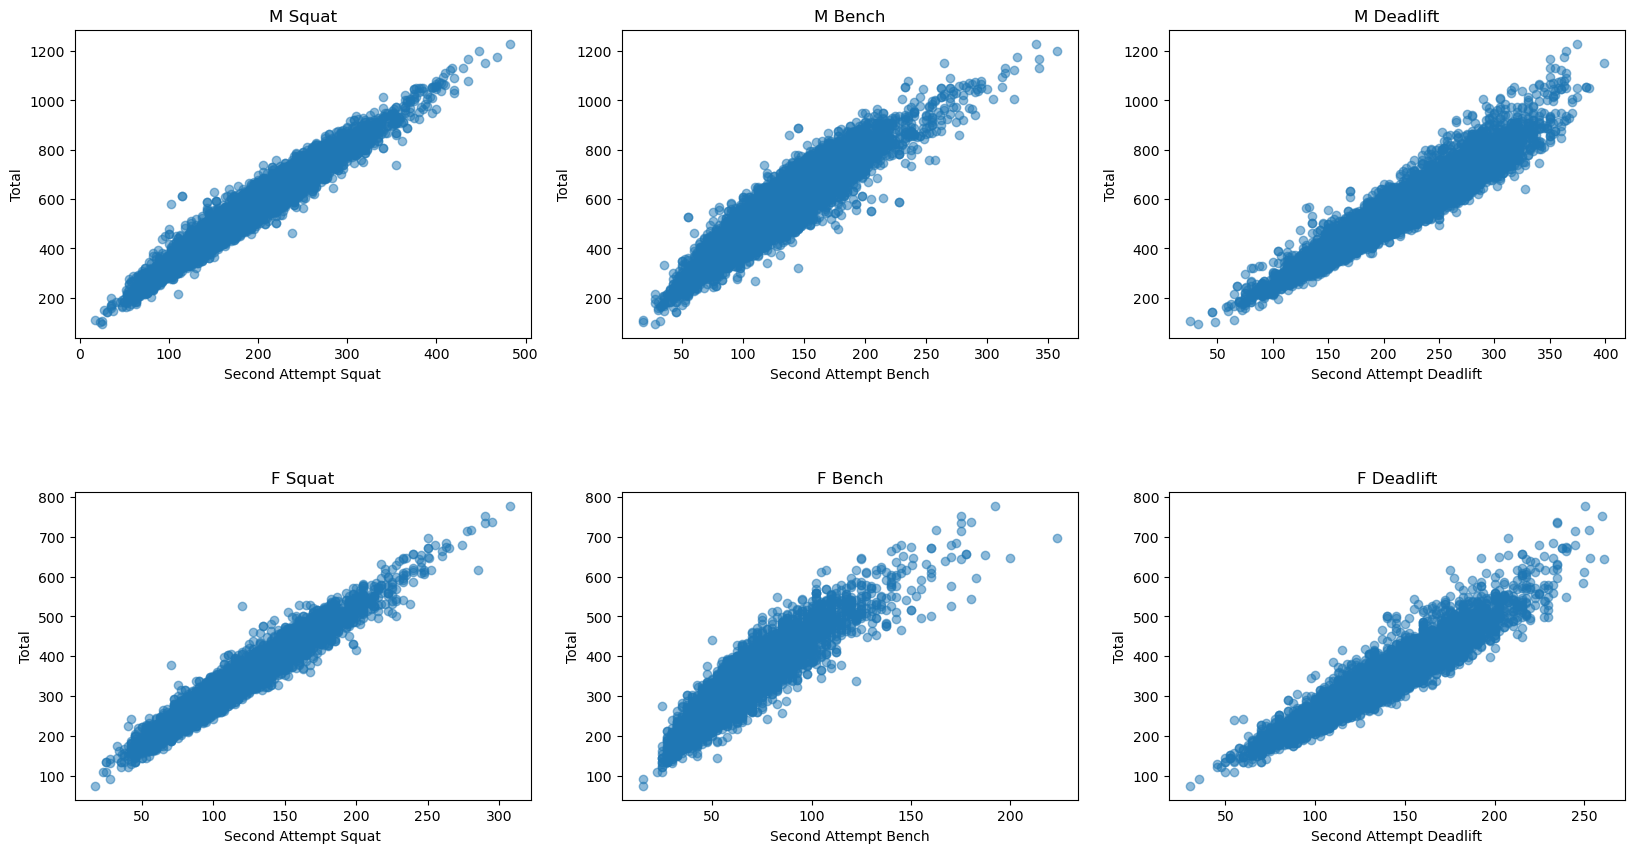

In [11]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
fig.subplots_adjust(hspace=0.5)

for i, sex in enumerate(['M', 'F']):
    df_sex = df[df['Sex'] == sex]
    for j, lift in enumerate(['Squat', 'Bench', 'Deadlift']):
        col_lift = lift + '2Kg'
        col_total = 'TotalKg'
        axs[i, j].scatter(df_sex[col_lift], df_sex[col_total], alpha=0.5)
        axs[i, j].set_title(sex + ' ' + lift)
        axs[i, j].set_xlabel('Second Attempt ' + lift)
        axs[i, j].set_ylabel('Total')
plt.show()

Based on the plots, it is evident that the squat exhibits a strong linear trend for both males and females. Additionally, the bench and deadlift also show promising signs of a linear relationship, although with some variations. The bench trend demonstrates a steeper growth rate, while the deadlift trend appears to be more gradual with slight curvature.

These findings align with expectations to some extent. In powerlifting meets, participants generally have predetermined goals for each lift and warm up accordingly. First attempts are typically weights that lifters are confident they can successfully execute, relative to their overall total. Therefore, the observed trends are not entirely surprising, but it is essential to visualize them to confirm.

Interestingly, there is minimal discrepancy between males and females in these trends. However, it would be intriguing to explore the influence of age on these relationships. Let's delve deeper and examine how these plots differ when stratified by sex and age groups to determine if the trends remain consistent.

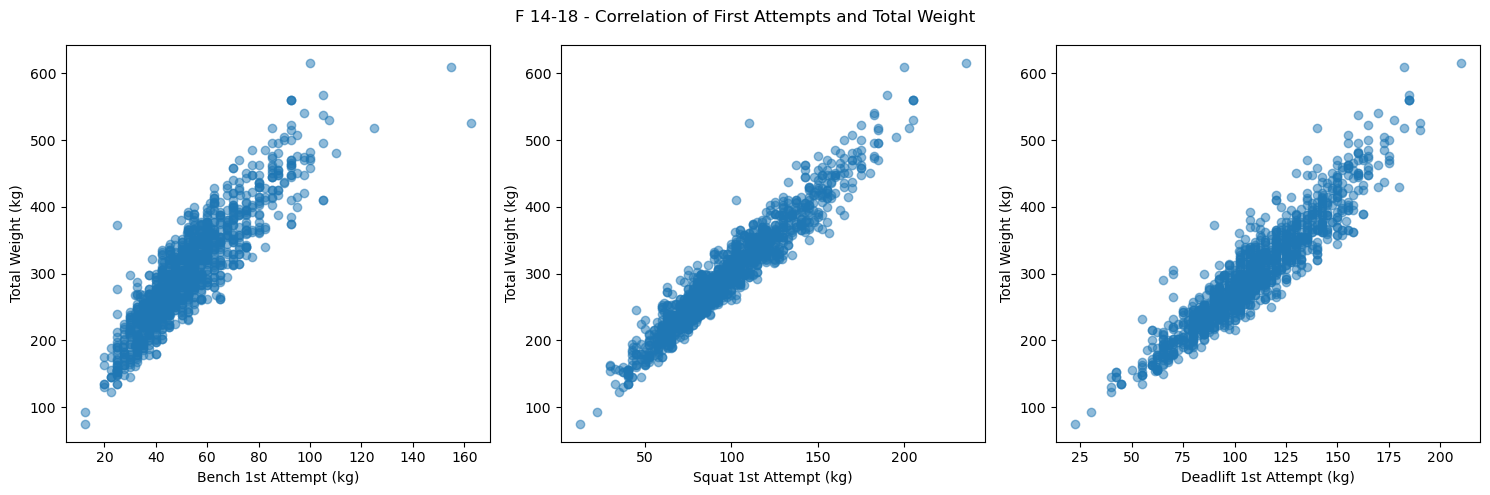

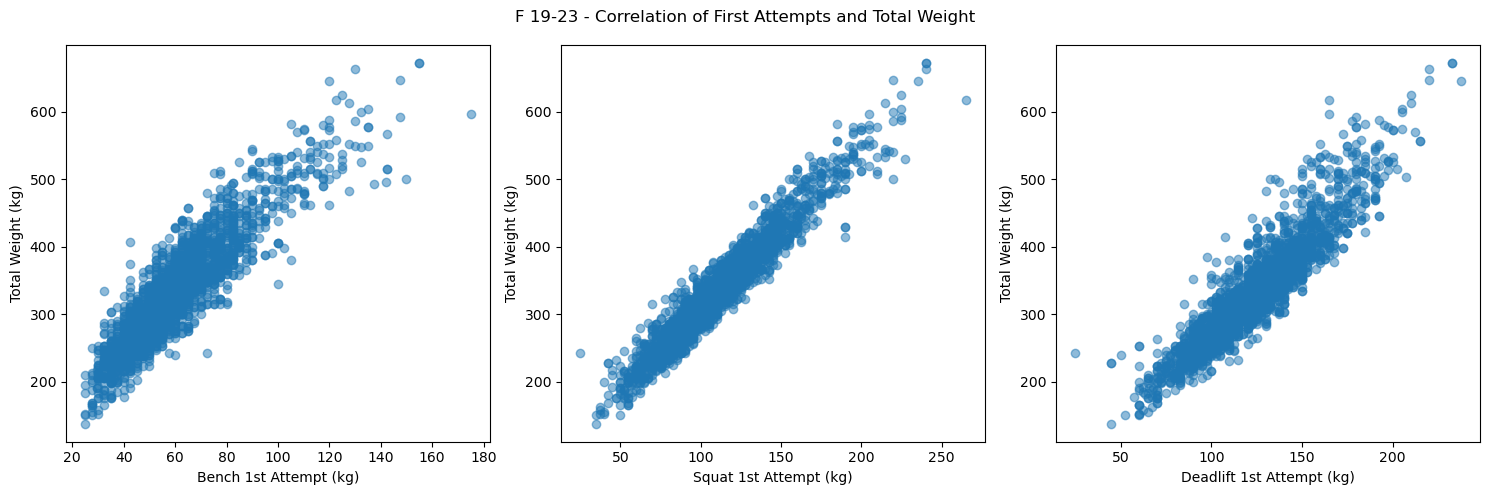

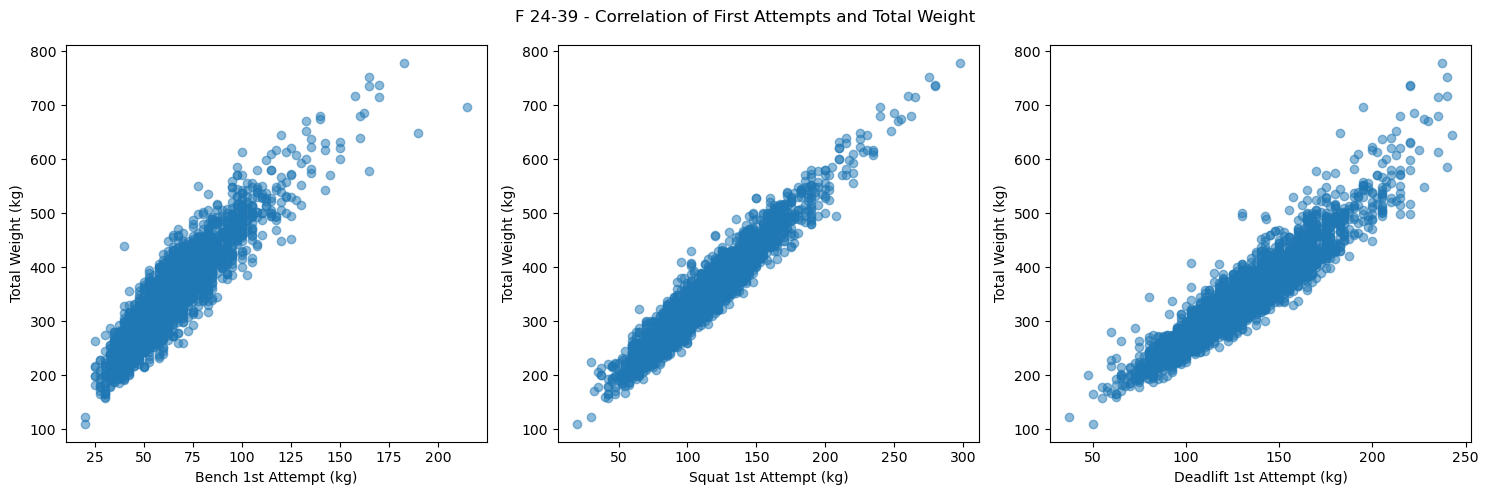

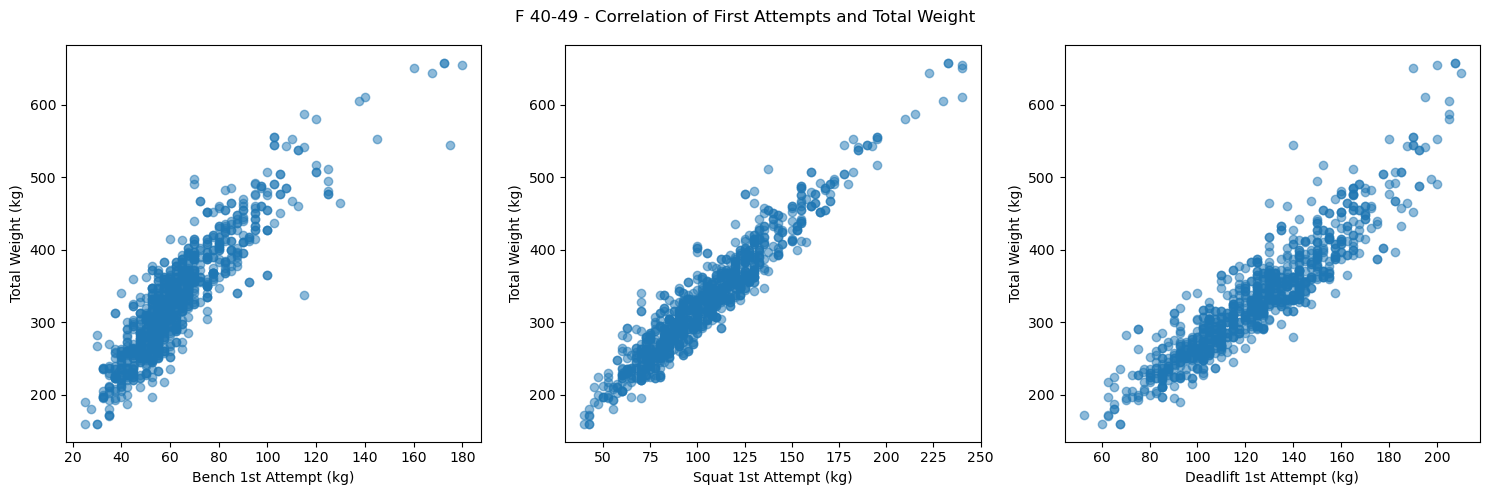

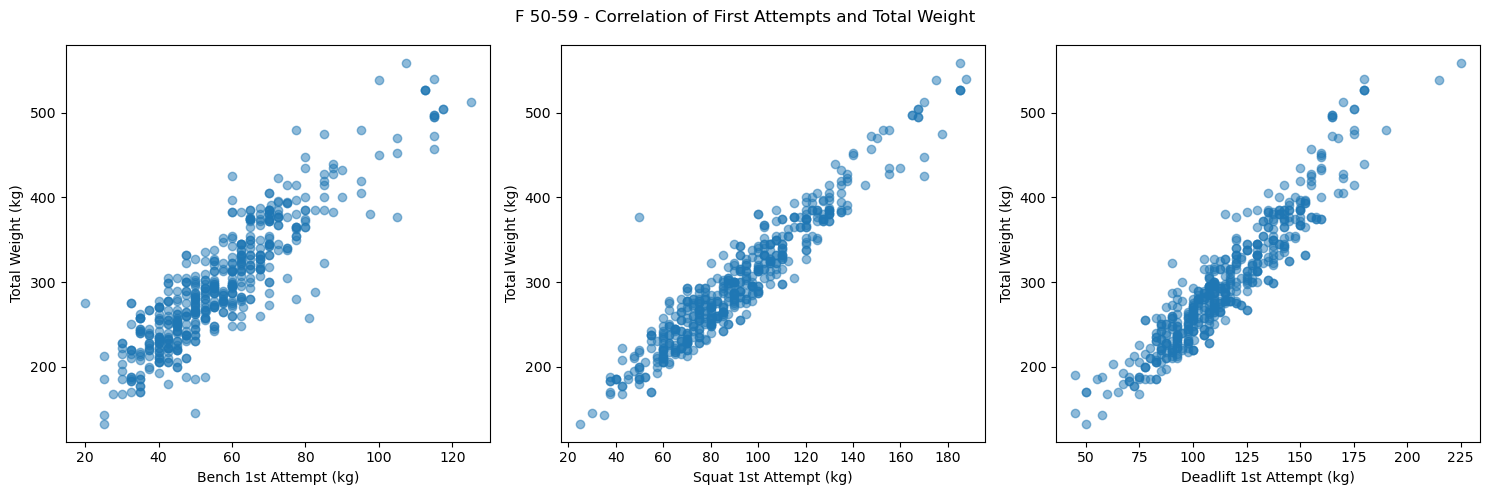

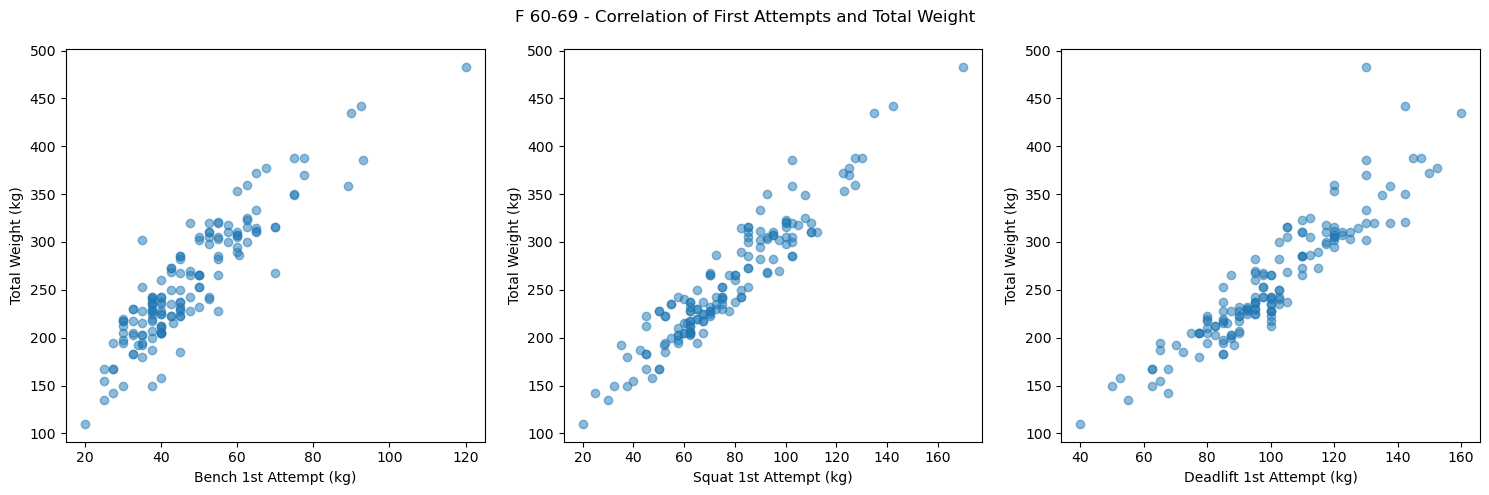

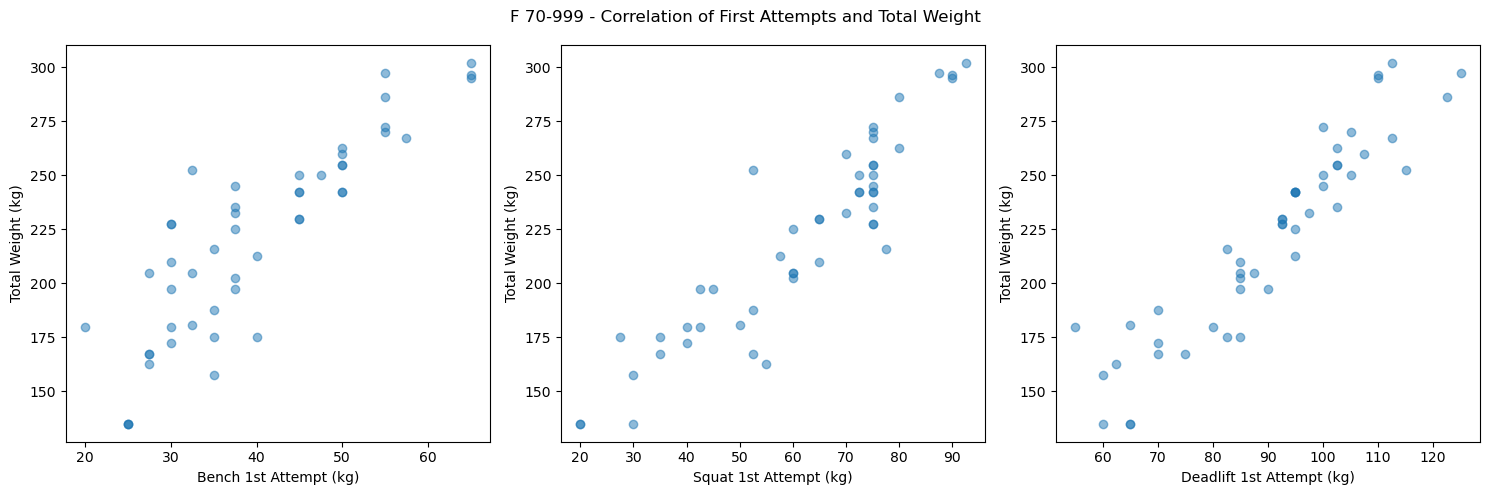

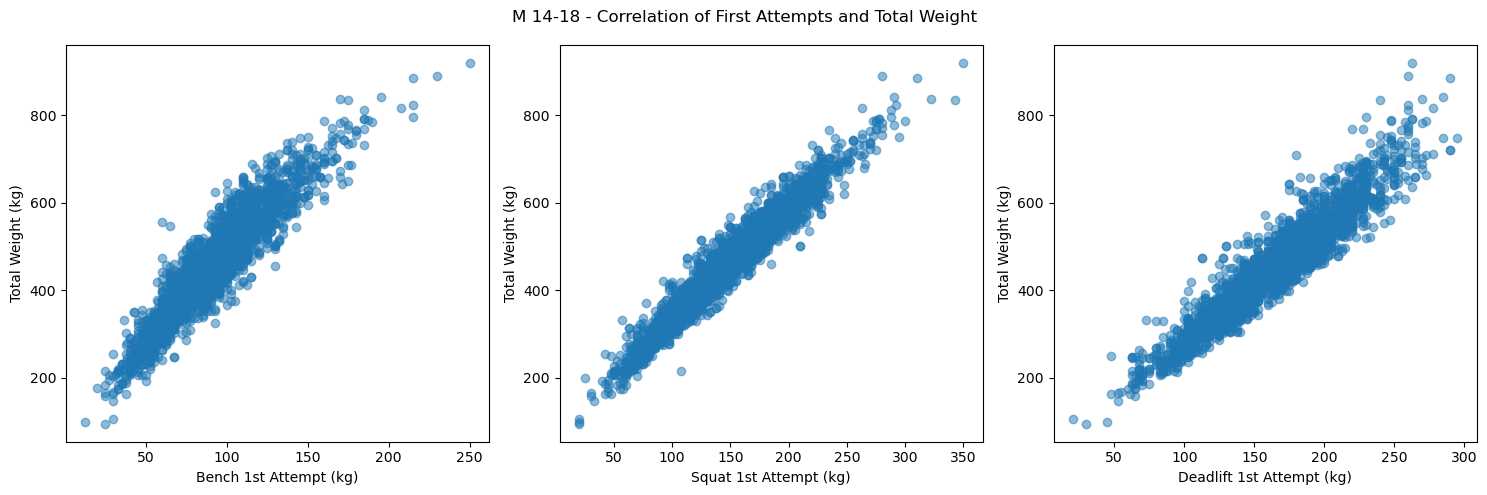

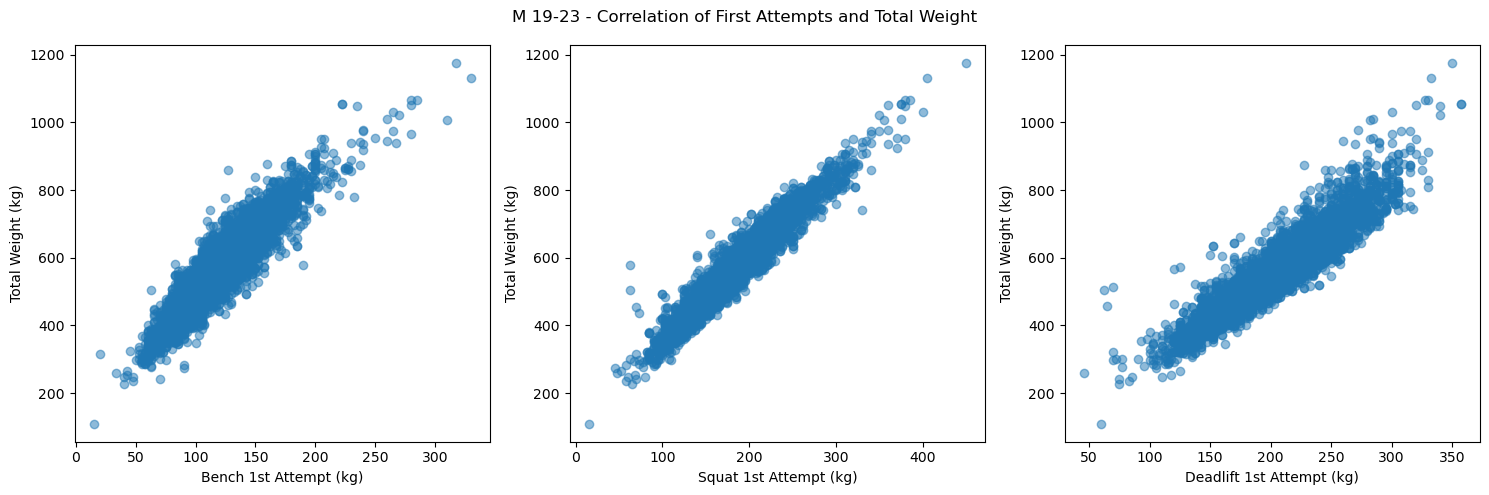

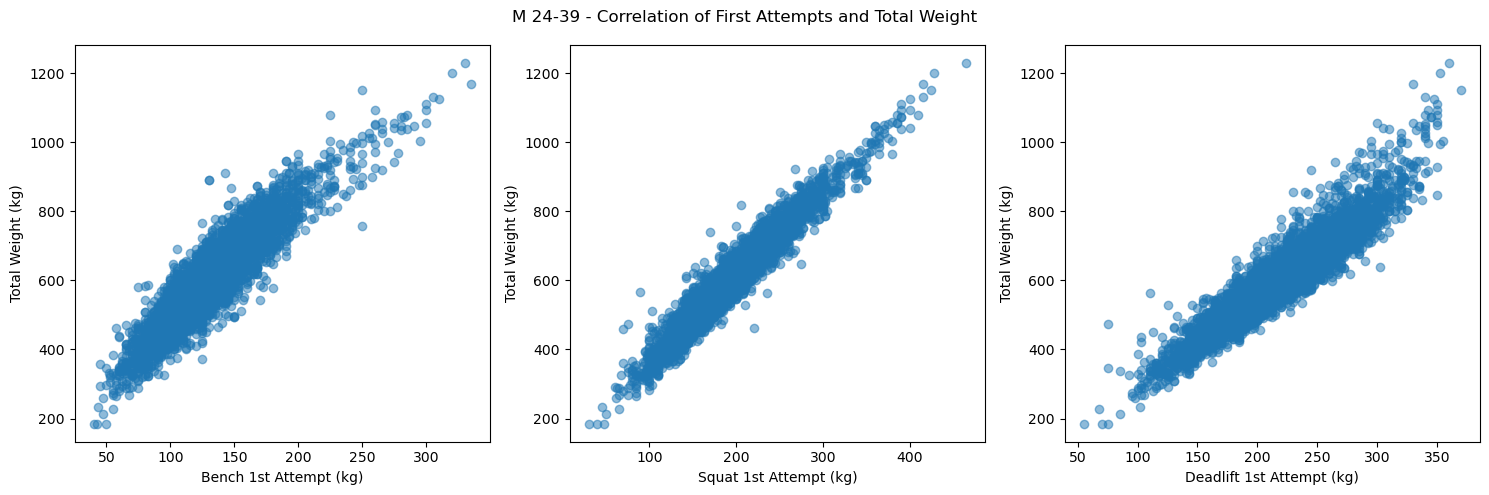

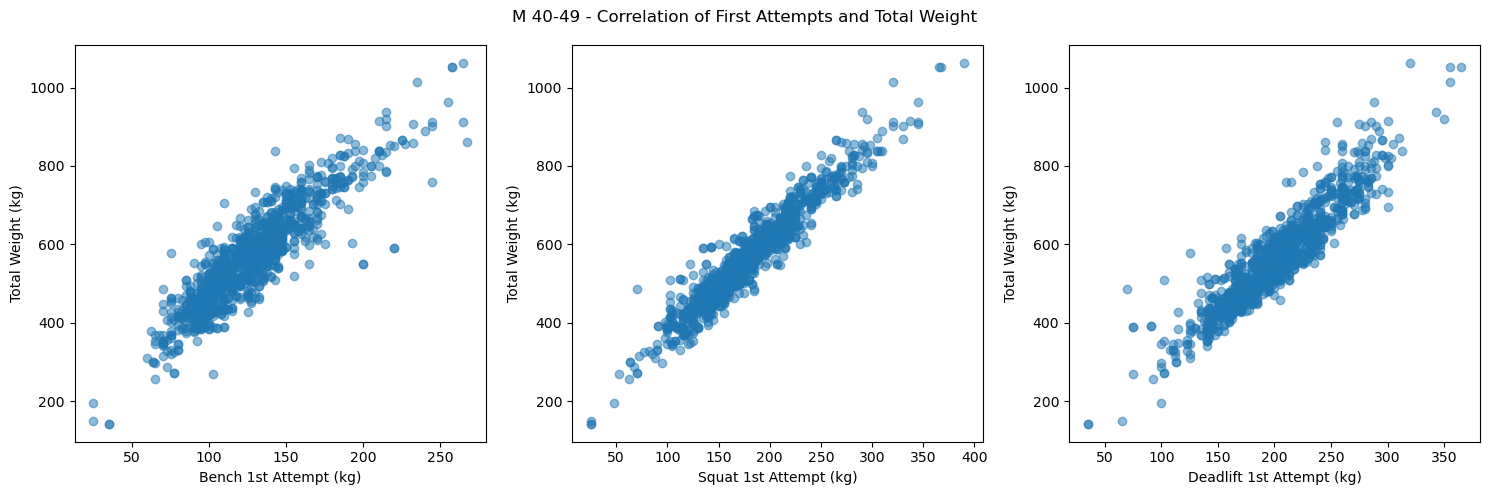

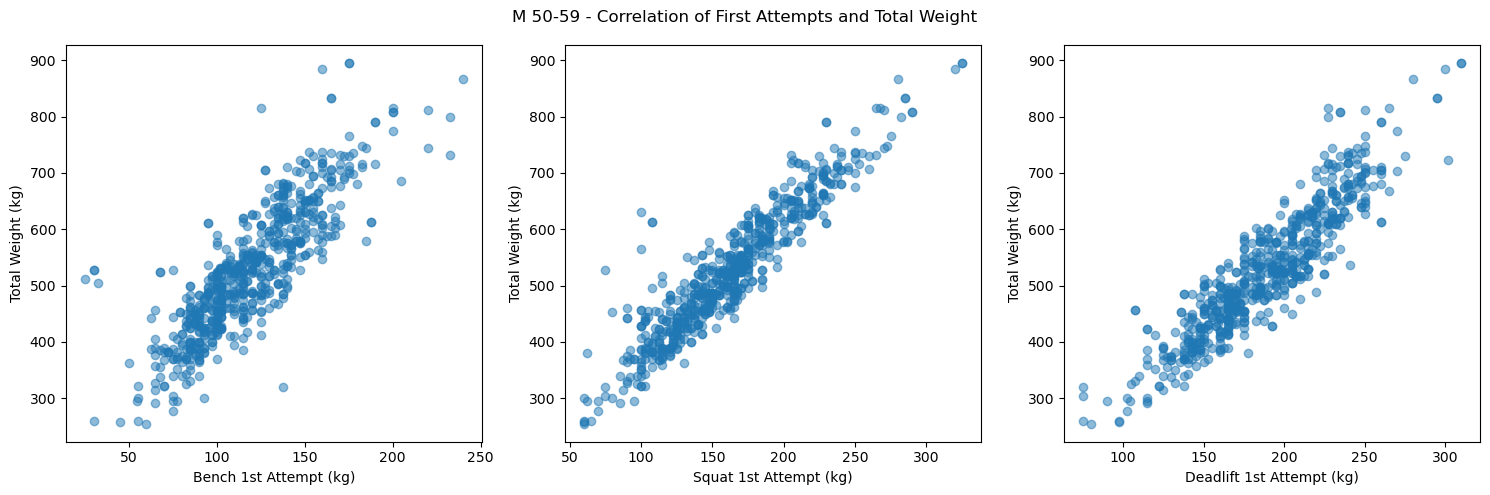

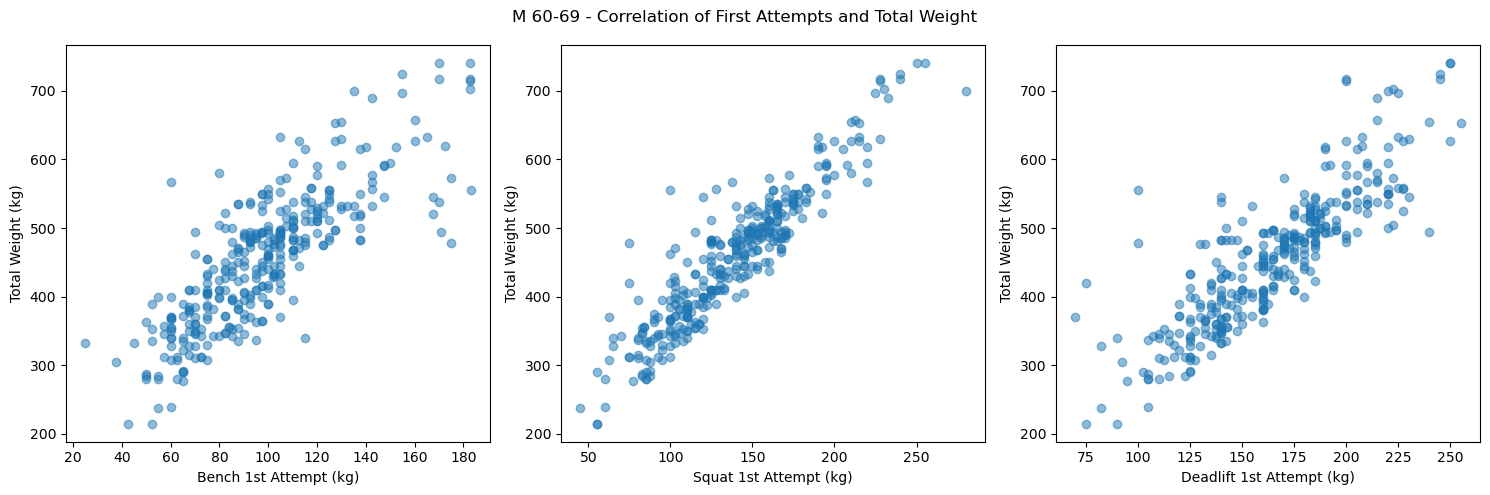

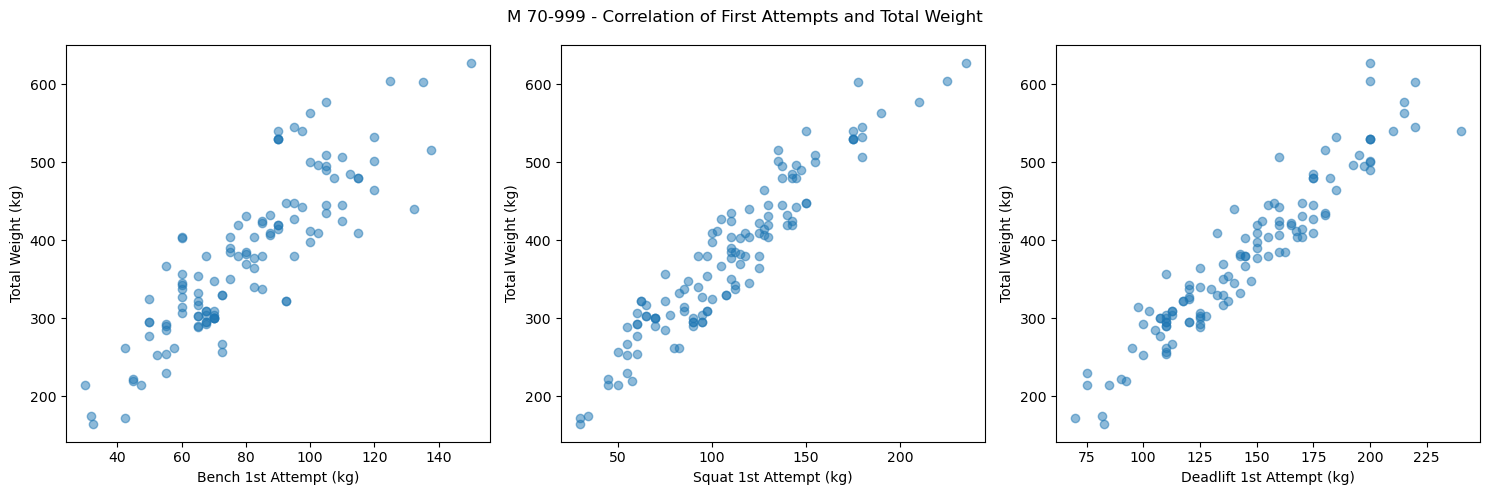

In [12]:
# group by sex and birth year class
grouped = df.groupby(['Sex', 'BirthYearClass'])

# iterate over groups and plot correlations
for i, (group, data) in enumerate(grouped):
    sex, birthyearclass = group
    
    # get the middle of each birth year class
    birthyearclass_mid = [int((int(x.split("-")[0]) + int(x.split("-")[1]))/2) for x in data['BirthYearClass']]
    
    # plot correlations
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
    
    axs[0].scatter(data['Bench1Kg'], data['TotalKg'], alpha=0.5)
    axs[0].set_xlabel('Bench 1st Attempt (kg)')
    axs[0].set_ylabel('Total Weight (kg)')
    
    axs[1].scatter(data['Squat1Kg'], data['TotalKg'], alpha=0.5)
    axs[1].set_xlabel('Squat 1st Attempt (kg)')
    axs[1].set_ylabel('Total Weight (kg)')
    
    axs[2].scatter(data['Deadlift1Kg'], data['TotalKg'], alpha=0.5)
    axs[2].set_xlabel('Deadlift 1st Attempt (kg)')
    axs[2].set_ylabel('Total Weight (kg)')
    
    
    fig.suptitle(f'{sex} {birthyearclass} - Correlation of First Attempts and Total Weight')
    
    plt.tight_layout()
    plt.show()

The analysis of opening lift trends considering age and sex reveals that the observed patterns persist, indicating that the starting point for lifters, based on their intended top lifts, remains consistent across different demographics. This finding suggests that there may not be a significant correlation between sex, age, and the opening lift attempts' relationship to the total weight achieved. This insight is intriguing and implies that when exploring correlations between opening lift attempts and total weight, it may not be necessary to consider sex and age as influential factors.

However, these findings raise new questions that could lead to more intriguing discoveries. For instance, are there general trends in transitioning from the first to the second attempt or from the second to the third attempt? Do the bench, squat, and deadlift lifts exhibit similar patterns in these transitions? Additionally, what other factors, such as age, sex, and weight, might contribute to these jumps between attempts? To investigate these questions, let's create features based on the percent differences between each subsequent lift for the squat, bench, and deadlift events. Furthermore, let's begin by comparing the trends within weight classes to gain further insights.

In [14]:
# Calculate percentage difference for attempts 1 to 2 and 2 to 3
df['Bench12PercentDiff'] = ((df['Bench2Kg'] - df['Bench1Kg']) / df['Bench1Kg']) * 100
df['Bench23PercentDiff'] = ((df['Bench3Kg'] - df['Bench2Kg']) / df['Bench2Kg']) * 100
df['Squat12PercentDiff'] = ((df['Squat2Kg'] - df['Squat1Kg']) / df['Squat1Kg']) * 100
df['Squat23PercentDiff'] = ((df['Squat3Kg'] - df['Squat2Kg']) / df['Squat2Kg']) * 100
df['Deadlift12PercentDiff'] = ((df['Deadlift2Kg'] - df['Deadlift1Kg']) / df['Deadlift1Kg']) * 100
df['Deadlift23PercentDiff'] = ((df['Deadlift3Kg'] - df['Deadlift2Kg']) / df['Deadlift2Kg']) * 100

# Group the data by lift and calculate mean percentage difference for each lift
lift_groups = df.groupby('WeightClass')[['Bench12PercentDiff', 'Bench23PercentDiff', 'Squat12PercentDiff', 'Squat23PercentDiff', 'Deadlift12PercentDiff', 'Deadlift23PercentDiff']]
mean_percent_diff = lift_groups.mean()
mean_percent_diff

Bench12PercentDiff  Bench23PercentDiff  Squat12PercentDiff  \
WeightClass                                                               
47kg                   9.217058            6.686350            8.525675   
52kg                   8.637485            6.005720            7.613078   
57kg                   8.309339            5.893291            7.440370   
63kg                   8.021261            5.614443            7.222643   
72kg                   7.252966            5.068700            6.784184   
84kg                   6.957221            4.861000            6.741862   
93kg                   6.789667            4.866404            6.595476   
105kg                  7.081237            4.910506            6.737796   
120kg+                 6.875221            5.079433            6.754716   

             Squat23PercentDiff  Deadlift12PercentDiff  Deadlift23PercentDiff  
WeightClass                                                                    
47kg                   6.063309               8.412385               6.047253  
52kg                   5.711908               8.041704               5.826675  
57kg                   5.652076               7.760215               5.851623  
63kg                   5.475819               7.480750               5.596313  
72kg                   5.124431               7.141596               5.246906  
84kg                   5.020052               7.114098               5.193180  
93kg                   5.010194               7.029945               5.096721  
105kg                  5.107322               7.068021               5.224477  
120kg+                 5.135136               7.075729               5.154207

This data is useful but it's still a bit hard to see if there are differences. Let's get a better visual.

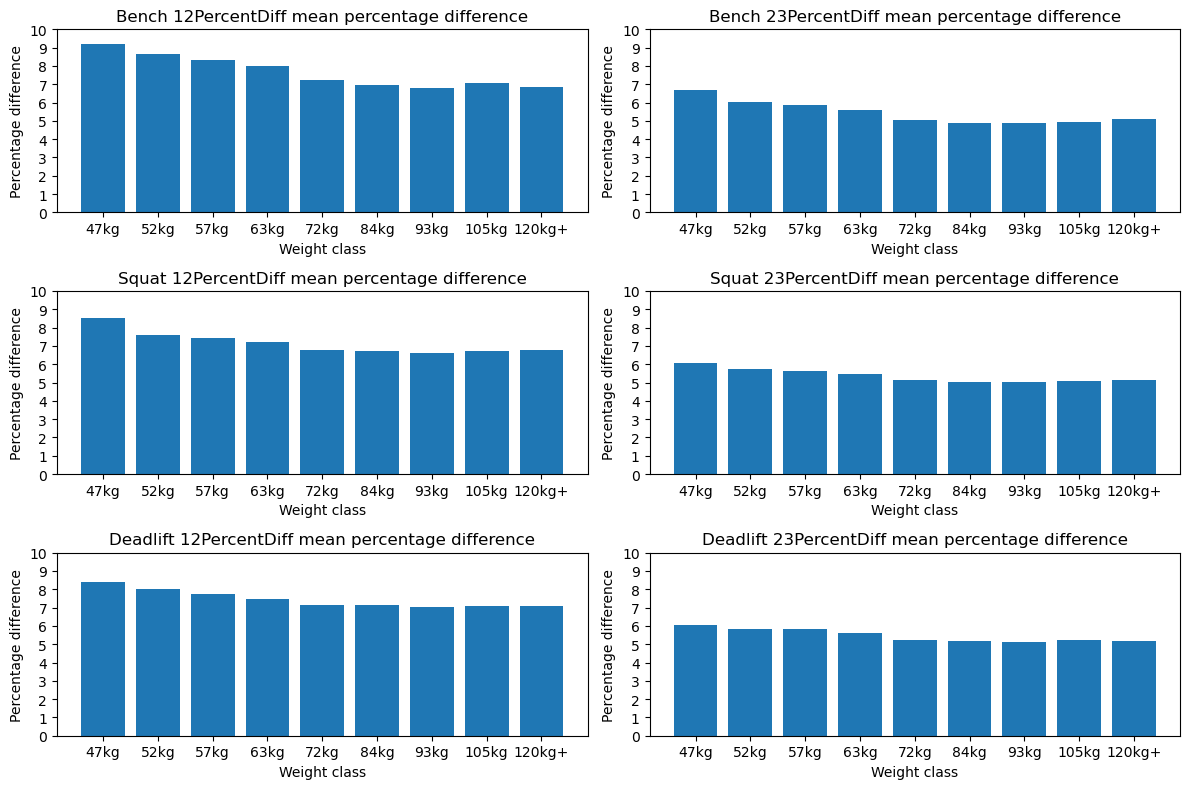

In [15]:
# Create bar plots of mean percentage difference for each lift
lifts = ['Bench', 'Squat', 'Deadlift']
lift_diffs = ['12PercentDiff', '23PercentDiff']
fig, axs = plt.subplots(len(lifts), len(lift_diffs), figsize=(12, 8))
y_ticks = [0,1,2,3,4,5,6,7,8,9,10]
for i, lift in enumerate(lifts):
    for j, diff in enumerate(lift_diffs):
        col_name = f"{lift}{diff}"
        axs[i, j].bar(mean_percent_diff.index, mean_percent_diff[col_name])
        axs[i, j].set_title(f"{lift} {diff} mean percentage difference")
        axs[i, j].set_xlabel('Weight class')
        axs[i, j].set_ylabel('Percentage difference')
        axs[i, j].set_yticks(y_ticks)
fig.tight_layout()
plt.show()

So there seems to be slightly higher percent differences for lighter individuals. Let's look into grouping by birth year classes (ie ages grouped together) and see if there is anything interesting going on here.

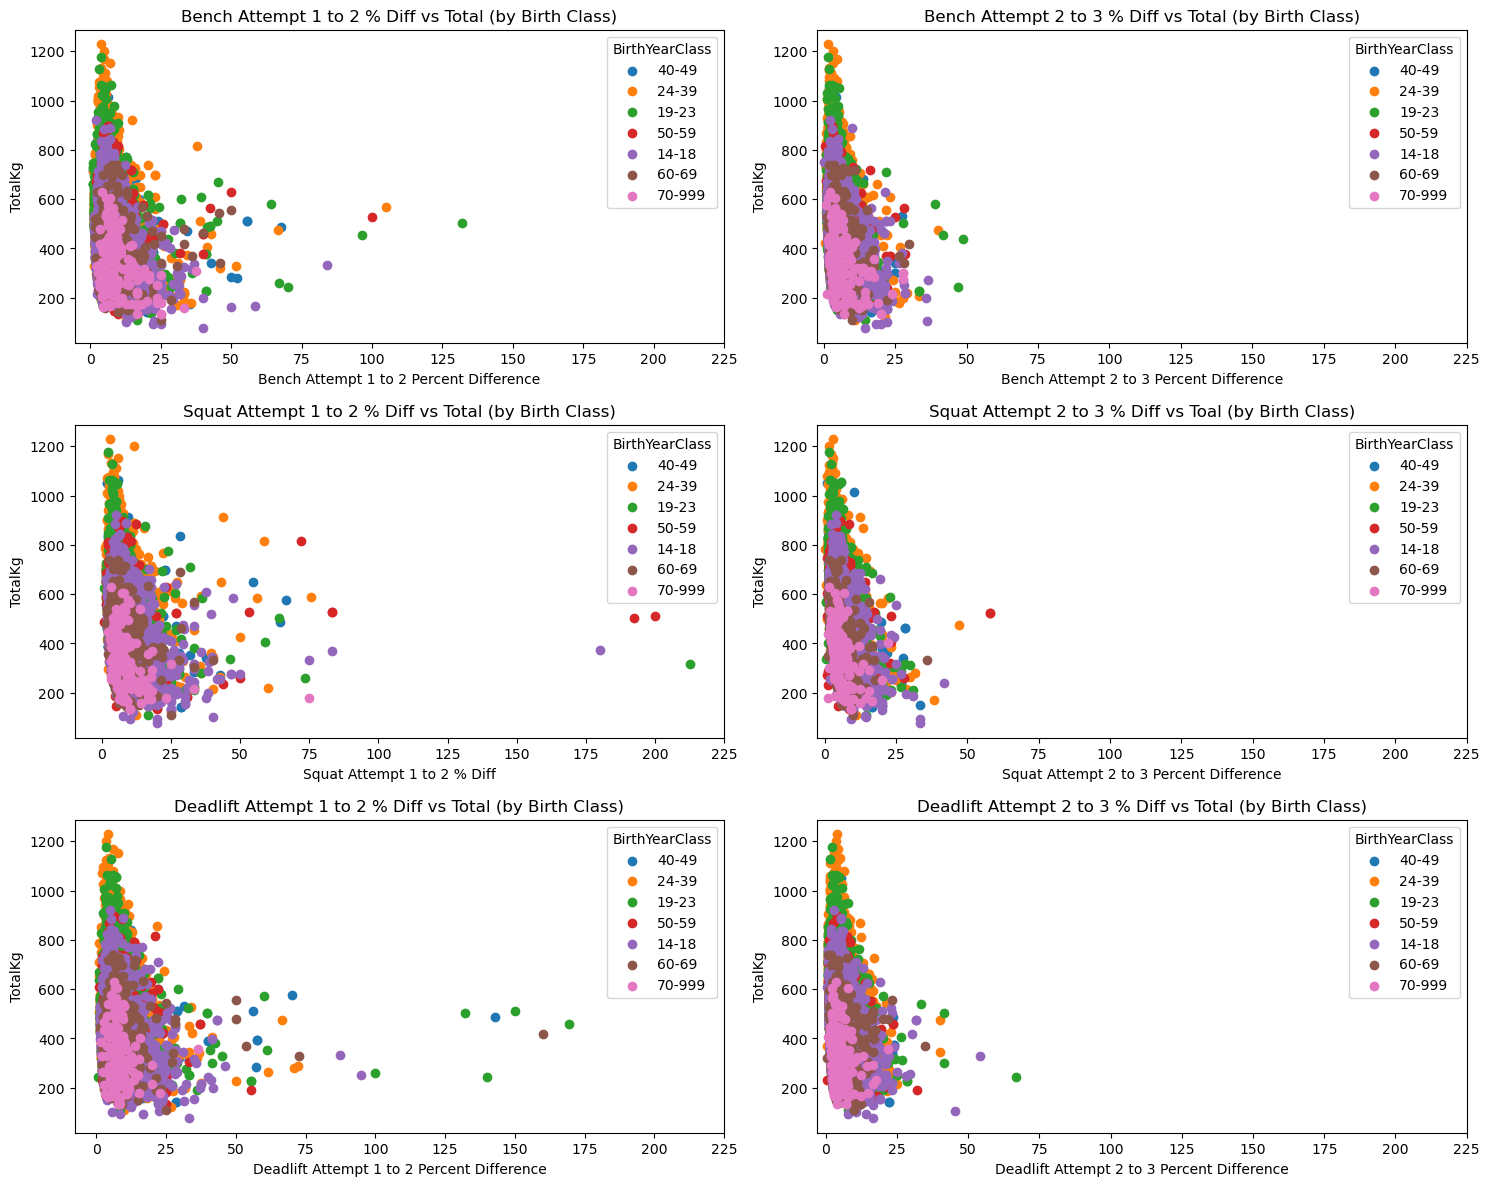

In [16]:
lifts = ['Squat', 'Bench', 'Deadlift']
lift_diff_cols = ['Squat12PercentDiff', 'Squat23PercentDiff', 'Bench12PercentDiff', 'Bench23PercentDiff', 'Deadlift12PercentDiff', 'Deadlift23PercentDiff']
titles = ["Bench Attempt 1 to 2 % Diff vs Total (by Birth Class)",
          "Bench Attempt 2 to 3 % Diff vs Total (by Birth Class)",
          "Squat Attempt 1 to 2 % Diff vs Total (by Birth Class)",
          "Squat Attempt 2 to 3 % Diff vs Toal (by Birth Class)",
          "Deadlift Attempt 1 to 2 % Diff vs Total (by Birth Class)",
          "Deadlift Attempt 2 to 3 % Diff vs Total (by Birth Class)"]
x_titles = ["Bench Attempt 1 to 2 Percent Difference",
           "Bench Attempt 2 to 3 Percent Difference",
           "Squat Attempt 1 to 2 % Diff",
          "Squat Attempt 2 to 3 Percent Difference",
          "Deadlift Attempt 1 to 2 Percent Difference",
          "Deadlift Attempt 2 to 3 Percent Difference"]
total_col = 'TotalKg'
byc_col = 'BirthYearClass'

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15,12))
fig.subplots_adjust(hspace=2)

for i, lift in enumerate(lifts):
    lift_diff_cols_for_lift = [col for col in lift_diff_cols if lift in col]
    for j, diff_col in enumerate(lift_diff_cols_for_lift):
        # Create a scatter plot of Total vs percent difference, split by birth year class
        ax = axs[i,j]
        for byc in df[byc_col].unique():
            mask = df[byc_col] == byc
            x = df.loc[mask, diff_col]
            y = df.loc[mask, total_col]
            ax.scatter(x, y, label=byc)
        ax.set_xlabel(x_titles[i*2+j])
        ax.set_ylabel(total_col)
        ax.set_title(titles[i*2+j])
        ax.set_xticks(range(0, 226, 25))
        ax.legend(title=byc_col, loc='upper right')
        
plt.tight_layout()
plt.show()

It seems that some outliers are extending the graphs which makes real trends hard to see. Let's limit our vision to about 30% increases as the maximum value.

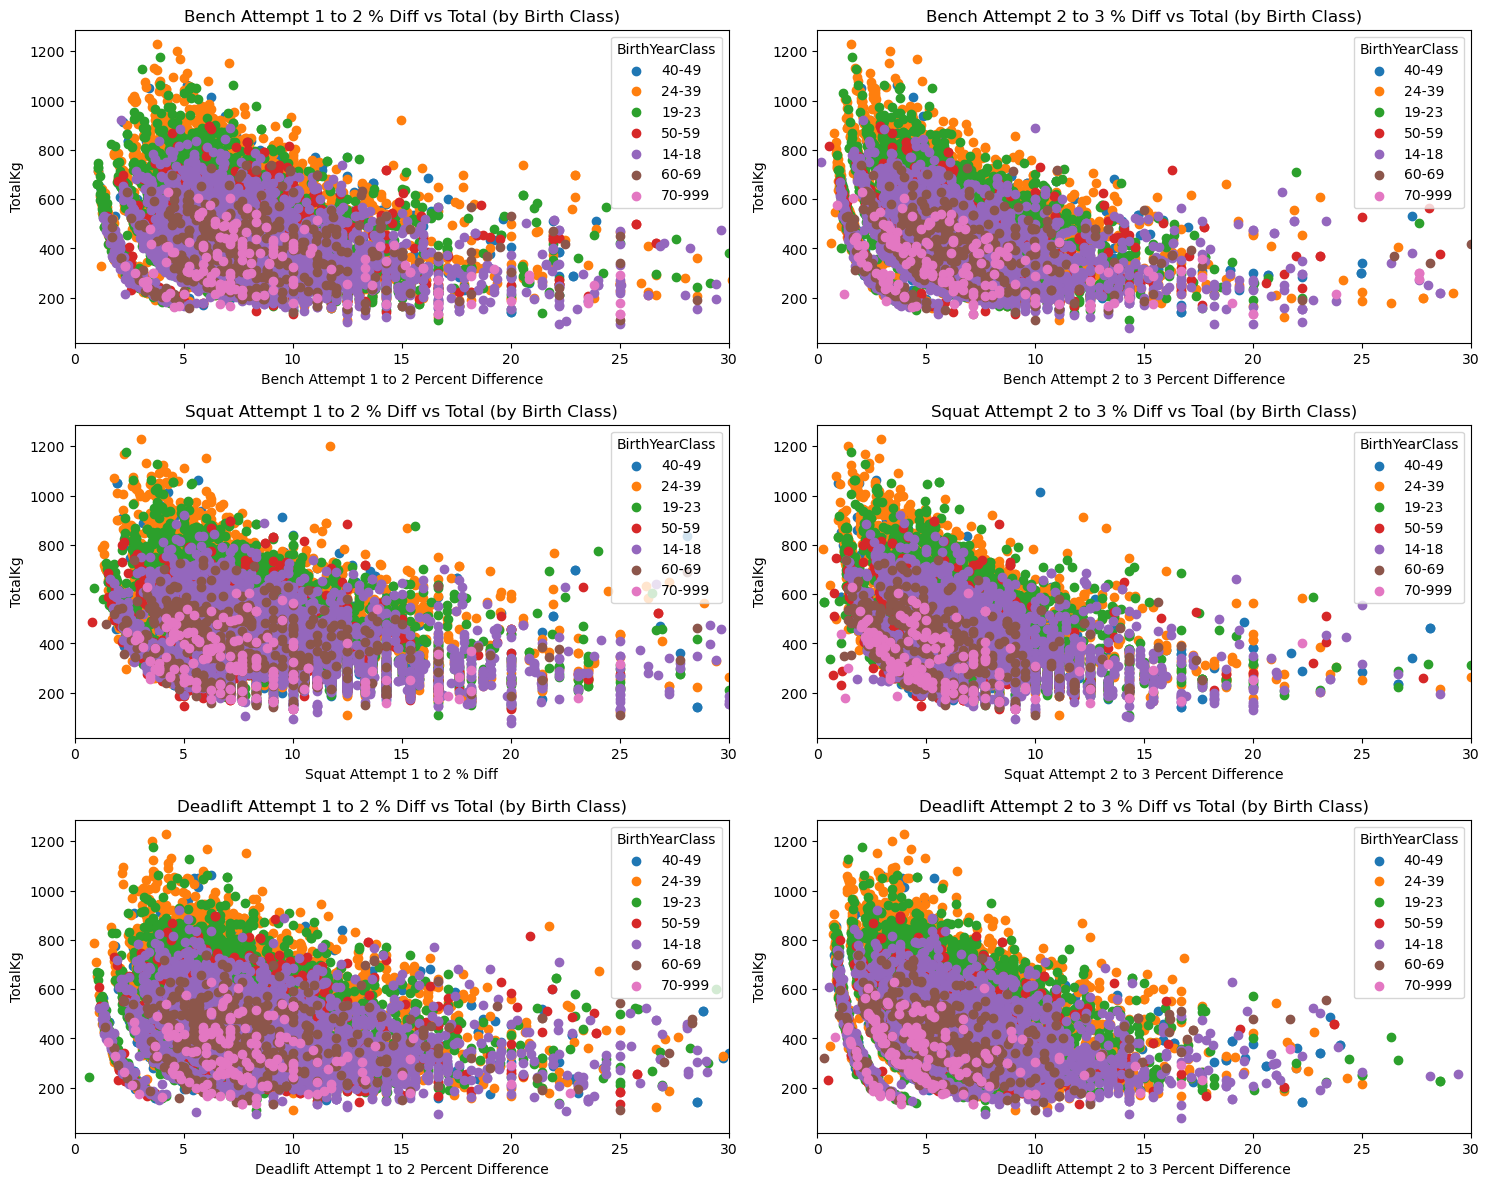

In [17]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15,12))
fig.subplots_adjust(hspace=2)

for i, lift in enumerate(lifts):
    lift_diff_cols_for_lift = [col for col in lift_diff_cols if lift in col]
    for j, diff_col in enumerate(lift_diff_cols_for_lift):
        # Create a scatter plot of Total vs percent difference, split by birth year class
        ax = axs[i,j]
        for byc in df[byc_col].unique():
            mask = df[byc_col] == byc
            x = df.loc[mask, diff_col]
            y = df.loc[mask, total_col]
            ax.scatter(x, y, label=byc)
        ax.set_xlabel(x_titles[i*2+j])
        ax.set_ylabel(total_col)
        ax.set_title(titles[i*2+j])
        ax.set_xlim(0, 30)
        ax.set_xticks(range(0, 31, 5))
        ax.legend(title=byc_col, loc='upper right')
        
plt.tight_layout()
plt.show()

Indeed, the graphs reveal intriguing insights. The trends within each age group exhibit similar patterns, with a slight deviation from linearity towards an exponential or inverse logarithmic relationship. This departure from linearity adds an interesting dimension to our analysis. Additionally, the trends for all three lifts (squat, bench, and deadlift) and for both the first-to-second attempt and second-to-third attempt transitions share a similar pattern. This consistency opens up the possibility of establishing a more meaningful relationship between these jumps and the total weight lifted.

Having explored and explained various trends, we have now reached a point where we can proceed to the modeling and machine learning phase of this project. This phase will allow us to delve deeper into the data, extract valuable insights, and potentially develop predictive models to further enhance our understanding of powerlifting performance.

## <center> Modeling the Data </center>

First, I dropped some columns we did not use when creating trends in the last section. Then, I again made a CSV file to process the data for this section of the project which is shown below (but commented out since it is not necessary).

In [23]:
#new_df = df.drop(['Date','Glossbrenner', 'Dots', 'Place'], axis=1)
#new_df.to_csv('ML_data.csv', index=False)

In [24]:
# reading CSV through pandas
df = pd.read_csv('ML_data.csv')

# displaying head of Dataframe
df.head()

Age Sex BirthYearClass  BodyweightKg  Squat1Kg  Squat2Kg  Squat3Kg  \
0  43.5   F          40-49        114.65      70.0      80.0      92.5   
1  24.5   F          24-39         58.95     102.5     110.0     115.0   
2  24.5   F          24-39         71.00     110.0     117.5     122.5   
3  30.5   F          24-39         97.15     150.0     165.0     172.5   
4  43.5   F          40-49        114.65      70.0      80.0      92.5   

   Best3SquatKg  Bench1Kg  Bench2Kg  ...  Best3DeadliftKg  TotalKg   Wilks  \
0          92.5      65.0      75.0  ...            140.0    315.0  254.00   
1         115.0      57.5      60.0  ...            142.5    320.0  361.69   
2         122.5      67.5      72.5  ...            155.0    352.5  347.30   
3         172.5      65.0      72.5  ...            187.5    437.5  367.52   
4          92.5      65.0      75.0  ...            140.0    315.0  254.00   

   WeightClass  Bench12PercentDiff  Bench23PercentDiff  Squat12PercentDiff  \
0        105kg           15.384615           10.000000           14.285714   
1         57kg            4.347826            4.166667            7.317073   
2         63kg            7.407407            3.448276            6.818182   
3         93kg           11.538462            6.896552           10.000000   
4        105kg           15.384615           10.000000           14.285714   

   Squat23PercentDiff Deadlift12PercentDiff  Deadlift23PercentDiff  
0           15.625000             15.909091               9.803922  
1            4.545455              5.882353               5.555556  
2            4.255319              7.272727               5.084746  
3            4.545455              6.060606               7.142857  
4           15.625000             15.909091               9.803922  

[5 rows x 25 columns]

Before we get into modeling the data, I want to explain some topics that will be displayed after traning each model as one of the ways to try and analyze how well the model fitted the data. There are 4 main values I show for each model:  Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R-squared (R^2). These are explained below.


Interpretations:

1. Mean Squared Error (MSE): This measures the average squared difference between the predicted values and the actual values.
    
2. Root Mean Squared Error (RMSE): This is the square root of the MSE and is more interpretable as it is in the same units as the target variable. 

3. Mean Absolute Error (MAE): This measures the average absolute difference between the predicted values and the actual values. MAE is less sensitive to outliers compared to MSE. 

4. R-squared (R^2): This measures the proportion of the variance in the target variable that is explained by the independent variables in the model.  However, a high R^2 does not necessarily mean that the model is a good fit as it can still overfit the data.

Explanation of values:

1. Mean Absolute Error (MAE): Lower values are better, with a value of 0 indicating a perfect prediction.
2. Mean Squared Error (MSE): Lower values are better, with a value of 0 indicating a perfect prediction.
3. Root Mean Squared Error (RMSE): Lower values are better, with a value of 0 indicating a perfect prediction.
4. R-squared (R2): Higher values are better, with a value of 1 indicating a perfect prediction.
5. Explained Variance Score: Higher values are better, with a value of 1 indicating a perfect prediction.

It is important to note that we have to bring these values into the context of each of our models so we can understand what they truly mean.

When it came to modeling our powerlifting data, we had to figure out which factors would actually make a difference. I tried playing around with ideas like looking at the percent differences between lift attempts, bodyweight, and age to predict how much weight someone could lift. But guess what? None of the models I tried really worked out. I threw Linear Regression, Lasso Regression, logarithmic fits, Random Forest, and K-Folds into the mix, but all I got were mean absolute error (MAE) values around 75-100. Just to put it in perspective, that's like predicting someone's total weight lifted with an error of 165-220 pounds! Totally off the mark.

So, I had to come up with a new game plan. Instead of trying to predict the total weight lifted, I flipped the script and focused on what powerlifters usually plan for. See, most lifters go into a meet with specific goals in mind - the total weight they want to achieve and their opening lifts for bench press, squat, and deadlift. They don't usually know what their second and third attempts will look like since that changes throughout the meet. That got me thinking: Can I predict the percent differences between these attempts based on the initial parameters?

My first model was a basic Linear Regression. Let's look at some code to do this and analyze how well it did with some mathematical statistics and visualizations. 

In [50]:
# Split the data into features (X) and target (y)
X = df[['TotalKg', 'Squat1Kg', 'Bench1Kg', 'Deadlift1Kg']]
y = df[['Bench12PercentDiff', 'Bench23PercentDiff', 'Squat12PercentDiff',
       'Squat23PercentDiff', 'Deadlift12PercentDiff', 'Deadlift23PercentDiff']].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

# Initialize a linear regression model
lr_model = LinearRegression()

# Fit the model to the training data
lr_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = lr_model.predict(X_test)

# Print the model's score (R^2)
print(f"R^2 Score: {lr_model.score(X_test, y_test)}")

# Calculate and print other evaluation metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Explained Variance Score:', metrics.explained_variance_score(y_test, y_pred))

R^2 Score: 0.4645126873207009
Mean Absolute Error: 1.6326704761320168
Mean Squared Error: 6.713648768307856
Root Mean Squared Error: 2.591070969369202
Explained Variance Score: 0.4645853619067515


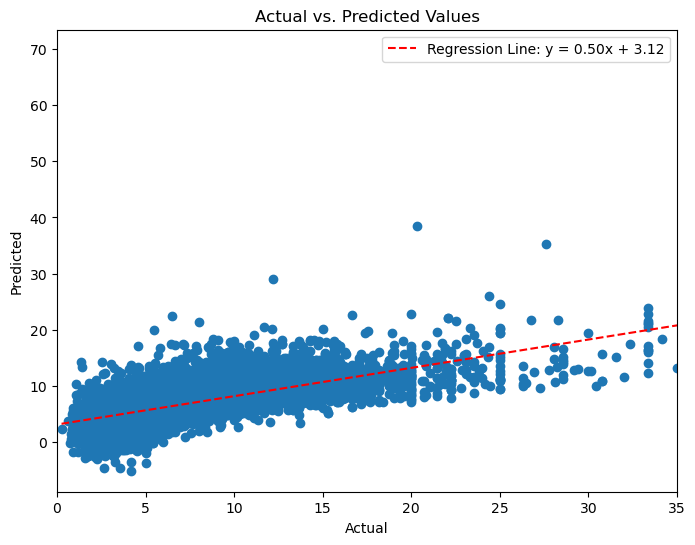

In [51]:
# Create a scatter plot of actual vs predicted values
fig = plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)

# Calculate the coefficients of the regression line
coefficients = np.polyfit(y_test.flatten(), y_pred.flatten(), 1)

# Calculate the regression line values
regression_x = np.array([np.min(y_test), np.max(y_test)])
regression_y = np.polyval(coefficients, regression_x)

# Add the regression line to the scatter plot
plt.plot(regression_x, regression_y, '--', color='red', label=f'Regression Line: y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}')

# Add labels and legend
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.xlim(0,35)

# Show the plot
plt.show()

Upon examining the printed data, we can observe that the R^2 value for our Linear Regression model is not particularly impressive. However, this could be attributed to various factors. More intriguingly, the MAE value of approximately 1.63 catches our attention. In context, this implies that, on average, our predictions were only off by 1.63%, which is quite reasonable. When examining the predicted versus actual plot, we can observe that the data generally adheres to the plotted trend line, which is an encouraging sign. Given the relatively better performance of this model compared to the ones I previously attempted, I decided to further explore its potential by experimenting with various machine learning models to potentially obtain improved results.

The next model I ventured into was Random Forest. Let's delve into the code for training this model and explore additional visualizations to gauge its accuracy.

In [56]:
# Split the data into features (X) and target (y)
X = df[['TotalKg', 'Squat1Kg', 'Bench1Kg', 'Deadlift1Kg']]
y = df[['Bench12PercentDiff', 'Bench23PercentDiff', 'Squat12PercentDiff',
       'Squat23PercentDiff', 'Deadlift12PercentDiff', 'Deadlift23PercentDiff']].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

# Initialize a random forest model with 100 trees
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_model.predict(X_test)

# Print the model's score (R^2)
print(f"R^2 Score: {rf_model.score(X_test, y_test)}")

# Calculate and print other evaluation metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Explained Variance Score:', metrics.explained_variance_score(y_test, y_pred))

R^2 Score: 0.522873224046696
Mean Absolute Error: 1.506278644827509
Mean Squared Error: 5.903331255768655
Root Mean Squared Error: 2.429677191679721
Explained Variance Score: 0.5229470055435405


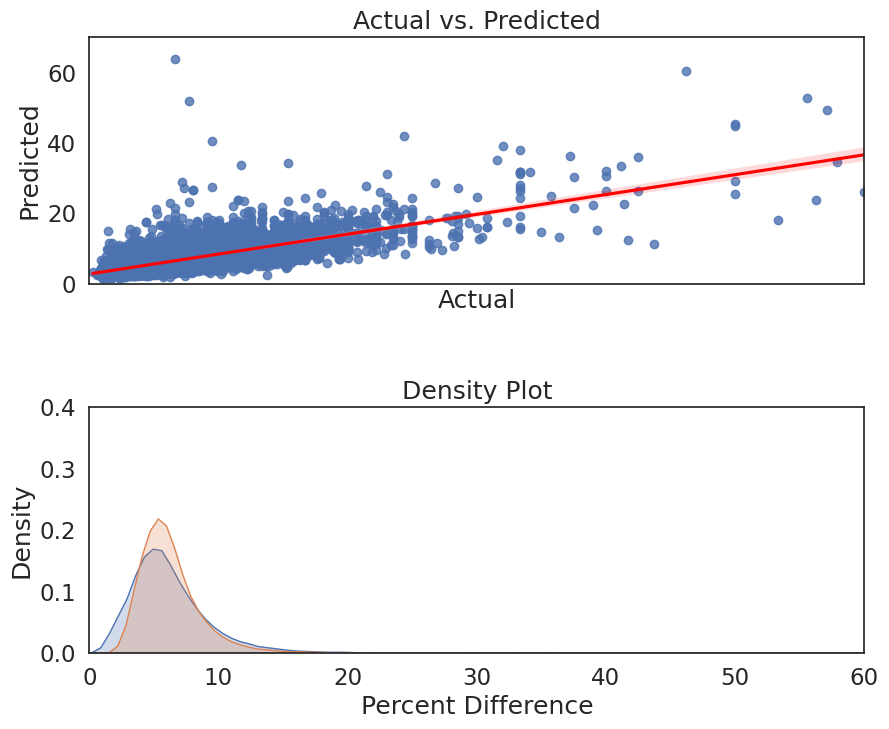

In [58]:
sns.set(style='white', font_scale=1.5)

# Create subplots with shared x-axis
fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(10,8))

# Create scatterplot with regression line for actual vs. predicted values
sns.regplot(x=y_test.flatten(), y=y_pred.flatten(), ax=axs[0], line_kws={"color":"red"})
axs[0].set_title('Actual vs. Predicted')
axs[0].set_xlabel('Actual')
axs[0].set_ylabel('Predicted')
axs[0].set_ylim([0,70])

# Create density plot for actual vs. predicted values
sns.kdeplot(y_test.flatten(), label='Actual', fill=True, ax=axs[1])
sns.kdeplot(y_pred.flatten(), label='Predicted', fill=True, ax=axs[1])
axs[1].set_title('Density Plot')
axs[1].set_xlabel('Percent Difference')
axs[1].set_ylabel('Density')
axs[1].set_ylim([0,0.4])

# Set x-axis limits for both subplots
for ax in axs:
    ax.set_xlim([0, 60])
# Show the plot
plt.subplots_adjust(hspace=0.5)
plt.show()

Great progress! It's evident that Random Forest performed better than Linear Regression, as reflected by the improved R^2 value and decreased MAE (1.51%). This outcome aligns with the strengths of Random Forest, which leverages an ensemble of decision trees to address outliers, variance, and bias, resulting in a more robust model. The regression line fitting well to the data and the overlap between the actual and predicted values in the density plots further affirm the model's effectiveness in capturing the data patterns.

In the field of machine learning, it is essential to explore various modeling techniques even when encountering success. With a diverse range of methods at our disposal, it is worth investigating if other models can outperform the current one. Another popular approach is K-Folds, which involves partitioning the data into multiple subsets, running the model on each subset, and averaging the results. In this case, we will continue using Random Forest as our chosen model due to its superior performance. However, selecting the optimal value for k, representing the number of data sample groups, is crucial in K-Folds. Hence, we will now run the model with different k values to identify the most suitable one. Let's take a look at the code for this process.

In [60]:
# Set up the data
X = df[['TotalKg', 'Age', 'BodyweightKg', 'Squat1Kg', 'Bench1Kg', 'Deadlift1Kg']].values
y = df[['Bench12PercentDiff', 'Bench23PercentDiff', 'Squat12PercentDiff',       'Squat23PercentDiff', 'Deadlift12PercentDiff', 'Deadlift23PercentDiff']].values

# Find the best k value using k-fold cross-validation
best_score = -np.inf
r2_scores = []
k_values = [2,3,4,5,6,7,8,9,10,11]
for k in k_values:
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    scores = []
    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
        rf_model.fit(X_train, y_train)
        score = rf_model.score(X_test, y_test)
        scores.append(score)
    avg_score = np.mean(scores)
    r2_scores.append(avg_score)
    print(f"Average R^2 score for k={k}: {avg_score}")

Average R^2 score for k=2: 0.4765926787770881
Average R^2 score for k=3: 0.5001842960634079
Average R^2 score for k=4: 0.50599654592396
Average R^2 score for k=5: 0.5214194230165615
Average R^2 score for k=6: 0.5243440259081164
Average R^2 score for k=7: 0.5245099152857321
Average R^2 score for k=8: 0.5273002718337676
Average R^2 score for k=9: 0.5340681973128207
Average R^2 score for k=10: 0.5369092554835346
Average R^2 score for k=11: 0.534841326223508


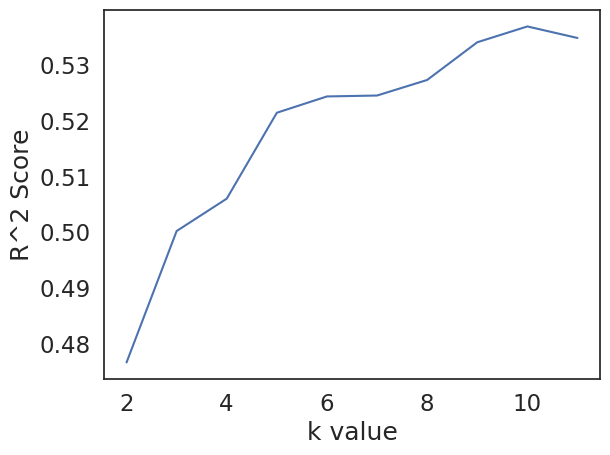

In [62]:
plt.plot(k_values, r2_scores)
plt.xlabel('k value')
plt.ylabel('R^2 Score')
plt.show()

We see that after the value of 10 for k, we see the R^2 value begins to drop. Hence, we can conclude that is likely best value for k. Let's run the model, print out evaluation statistics, and plot the data to see how well this sizes up to the other 2 models we have looked at.

In [63]:
# Set up the data
X = df[['TotalKg', 'Age', 'BodyweightKg', 'Squat1Kg', 'Bench1Kg', 'Deadlift1Kg']].values
y = df[['Bench12PercentDiff', 'Bench23PercentDiff', 'Squat12PercentDiff', 'Squat23PercentDiff', 'Deadlift12PercentDiff', 'Deadlift23PercentDiff']].values

# Train the random forest model using KFolds with k=10 and evaluate its performance
kf = KFold(n_splits=10, shuffle=True, random_state=42)
scores = []
mae_scores = []
mse_scores = []
rmse_scores = []
ev_scores = []
tests = []
predictions = []
for train_idx, test_idx in kf.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    tests.append(y_test)
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    score = rf_model.score(X_test, y_test)
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    ev = metrics.explained_variance_score(y_test, y_pred)
    scores.append(score)
    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    ev_scores.append(ev)
    predictions.append(y_pred)
avg_score = np.mean(scores)
avg_mae = np.mean(mae_scores)
avg_mse = np.mean(mse_scores)
avg_rmse = np.mean(rmse_scores)
avg_ev = np.mean(ev_scores)
print(f"Average R^2 score: {avg_score}")
print(f"Mean Absolute Error: {avg_mae}")
print(f"Mean Squared Error: {avg_mse}")
print(f"Root Mean Squared Error: {avg_rmse}")
print(f"Explained Variance Score: {avg_ev}")

Average R^2 score: 0.5369092554835346
Mean Absolute Error: 1.4530920899570874
Mean Squared Error: 6.138609798944555
Root Mean Squared Error: 2.472332262131271
Explained Variance Score: 0.5371134551961355


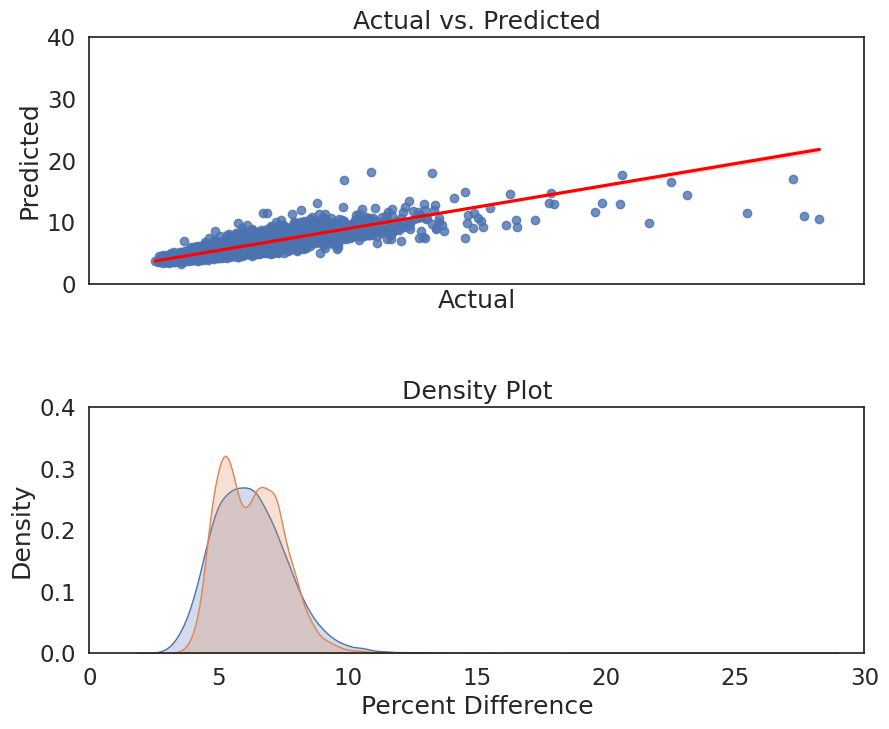

In [64]:
# Create a scatter plot of actual vs predicted values
# Convert generator object to list
min_len = min([len(pred) for pred in predictions])
for i in range(len(predictions)):
    predictions[i] = predictions[i][:min_len]
    tests[i] = tests[i][:min_len]

# Compute the mean of the predictions and the actual values
y_pred = np.mean(predictions, axis=0)
y_test = np.mean(tests, axis=0)

sns.set(style='white', font_scale=1.5)

# Create subplots with shared x-axis
fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(10,8))

# Create scatterplot with regression line for actual vs. predicted values
sns.regplot(x=y_test.flatten(), y=y_pred.flatten(), ax=axs[0], line_kws={"color":"red"})
axs[0].set_title('Actual vs. Predicted')
axs[0].set_xlabel('Actual')
axs[0].set_ylabel('Predicted')
axs[0].set_ylim([0,40])

# Create density plot for actual vs. predicted values
sns.kdeplot(y_test.flatten(), label='Actual', fill=True, ax=axs[1])
sns.kdeplot(y_pred.flatten(), label='Predicted', fill=True, ax=axs[1])
axs[1].set_title('Density Plot')
axs[1].set_xlabel('Percent Difference')
axs[1].set_ylabel('Density')
axs[1].set_ylim([0,0.4])

# Set x-axis limits for both subplots
for ax in axs:
    ax.set_xlim([0, 30])
# Show the plot
plt.subplots_adjust(hspace=0.5)
plt.show()

Congratulations on the continued progress! The K-Folds approach with Random Forest has resulted in further enhancements to the model's performance. With an increased R^2 value of 0.54, a reduced MAE of 1.45%, and improved variance, we observe a step forward in accuracy and predictive power. The plots provide visual evidence of the model's ability to fit the data well, reinforcing our confidence in its effectiveness.

Based on the iterative improvements achieved with each model and the diminishing returns observed, it's reasonable to conclude that the current model is the best one thus far. While there might be other modeling techniques to explore, the marginal gains obtained suggest that further iterations may not yield significantly better results. Therefore, it is a suitable point to conclude our modeling efforts here.

Moving forward, we can leverage this model to make predictions and gain insights into the relationships between opening lifts and subsequent attempts, which can be valuable for powerlifters aiming to optimize their performance in meets.

## <center> Interpretation: Insight & Policy Decision </center>

The insights gained from our data analysis have practical implications and potential applications in the realm of powerlifting. By utilizing our model's predictions of percent differences between opening lifts and subsequent attempts, lifters and coaches can make informed decisions to enhance training strategies and optimize performance during powerlifting meets.

One practical use of our model is in the training process itself. Many lifters engage in mock meets as part of their preparation, simulating the competitive environment. With our model's accurate predictions of the percent differences between lift attempts, individuals can efficiently plan their training progression, selecting appropriate jumps between lifts to closely mirror the anticipated patterns observed in actual meets. This enables lifters to tailor their training sessions to match the demands of the competition, improving their readiness and enhancing performance outcomes on meet day.

Another intriguing application of our model lies in predicting the behavior of competitors. By leveraging our model's predictive capabilities, lifters can gain valuable insights into the potential jumps their competitors might make between lift attempts. This knowledge equips individuals with a competitive advantage, allowing them to set realistic and strategic goals based on the actions of their rivals. This predictive ability can foster a greater sense of preparedness and reduce surprises during the meet, enabling lifters to better plan their own attempts and adjust their strategies accordingly.

Furthermore, beyond the realm of individual lifters, our model's predictions can also provide valuable information for meet organizers, coaches, and spectators. The ability to anticipate the expected performance of competitors and the subsequent jumps they are likely to make can facilitate better meet planning and decision-making. Coaches can tailor their coaching strategies based on the predicted trends, while spectators can gain deeper insights into the dynamics of the competition and appreciate the strategic elements at play.

Overall, our model's predictions of percent differences between lift attempts offer practical benefits for lifters, coaches, and meet organizers. By leveraging these insights, individuals can optimize their training approaches, set more informed goals, and make better strategic decisions during powerlifting meets, ultimately enhancing performance outcomes and the overall experience of the sport.

If additional time and resources were available, an intriguing direction for expanding this project would be to develop a model that suggests optimal attempts for each of the three main lifts (squat, bench press, and deadlift) based on various individual characteristics. By considering factors such as body weight, age, previous lifting performance, and training history, this model could provide lifters and coaches with valuable recommendations to maximize their chances of success in powerlifting meets.

## <center> Resources and Other Cool Projects </center>

If you are new to powerlifting and wanted to learn more, please check out these sources for more information:
- https://www.elitefts.com/education/training/powerlifting/the-beginners-guide-to-powerlifting-everything-youll-ever-need-to-know-about-competing/
- https://www.socalpowerlifting.net/post/how-do-powerlifting-meets-work
- https://www.issaonline.com/blog/post/beginners-guide-to-powerlifting-lifts-competitions-judges

If you wanted to get started making your own data science project, check out a few of these sites to learn more!
- https://www.geeksforgeeks.org/python-pandas-dataframe/
- https://www.getlore.io/knowledgecenter/data-standardization#:~:text=Data%20Standardization%20is%20a%20data,it's%20loaded%20into%20target%20systems.
- https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/
- https://statisticsbyjim.com/regression/comparing-regression-lines/
- https://builtin.com/data-science/gradient-descent

Here are links to the sources I used:
- https://www.washingtonpost.com/arts-entertainment/2019/04/19/using-youtube-show-off-world-powerlifting/
- https://www.openpowerlifting.org/
- https://openpowerlifting.gitlab.io/opl-csv/bulk-csv.html
- https://openpowerlifting.gitlab.io/opl-csv/bulk-csv-docs.html
- https://www.openpowerlifting.org/static/images/logo-compressed.e87731f9ce53411287c05e88356bf68e.svg

Moreover, while doing this project I found a few great Data Science projects that use the same data set and are really cool! If you're interested in this topic, check out some of the projects below:
- https://github.com/sophia-zohar/powerlifting_capstone
- https://oziolor.wordpress.com/2018/05/19/part-i-getting-old-you-can-still-lift/
- https://peidiwu.com/a-better-wilks-formula/
- https://www.bruinsportsanalytics.com/post/powerlifting
- https://devpost.com/software/machine-learning-applied-to-fitness-data
- https://github.com/brofessormcgonagall/openpowerlifting